In [1]:
#install.packages('Metrics')
library('astsa')
library(forecast)
library('Metrics')

options(repr.plot.width=14, repr.plot.height=6)


Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:astsa’:

    gas



Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




In [2]:
setwd('./')
#ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_resampled.csv")
ts_df <- read.csv("./data/proyectos_analiticos_20210501-20210531_no_weekends_resampled.csv")

In [3]:
ts_df <- ts_df[,2]

x = ts(ts_df, start=0 , frequency=1)


In [4]:
x = x/300000 # paso la unidad a slots

In [5]:
ts_df = ts_df/300000 # paso la unidad a slots

In [6]:
ts_df = ts(ts_df, start=0, frequency=1)

In [7]:
length(ts_df)

[1] 6048

In [8]:
time(ts_df)

A Time Series:
   [1]    0    1    2    3    4    5    6    7    8    9   10   11   12   13
  [15]   14   15   16   17   18   19   20   21   22   23   24   25   26   27
  [29]   28   29   30   31   32   33   34   35   36   37   38   39   40   41
  [43]   42   43   44   45   46   47   48   49   50   51   52   53   54   55
  [57]   56   57   58   59   60   61   62   63   64   65   66   67   68   69
  [71]   70   71   72   73   74   75   76   77   78   79   80   81   82   83
  [85]   84   85   86   87   88   89   90   91   92   93   94   95   96   97
  [99]   98   99  100  101  102  103  104  105  106  107  108  109  110  111
 [113]  112  113  114  115  116  117  118  119  120  121  122  123  124  125
 [127]  126  127  128  129  130  131  132  133  134  135  136  137  138  139
 [141]  140  141  142  143  144  145  146  147  148  149  150  151  152  153
 [155]  154  155  156  157  158  159  160  161  162  163  164  165  166  167
 [169]  168  169  170  171  172  173  174  175  176  177  178  179  180  181
 [183]  182  183  184  185  186  187  188  189  190  191  192  193  194  195
 [197]  196  197  198  199  200  201  202  203  204  205  206  207  208  209
 [211]  210  211  212  213  214  215  216  217  218  219  220  221  222  223
 [225]  224  225  226  227  228  229  230  231  232  233  234  235  236  237
 [239]  238  239  240  241  242  243  244  245  246  247  248  249  250  251
 [253]  252  253  254  255  256  257  258  259  260  261  262  263  264  265
 [267]  266  267  268  269  270  271  272  273  274  275  276  277  278  279
 [281]  280  281  282  283  284  285  286  287  288  289  290  291  292  293
 [295]  294  295  296  297  298  299  300  301  302  303  304  305  306  307
 [309]  308  309  310  311  312  313  314  315  316  317  318  319  320  321
 [323]  322  323  324  325  326  327  328  329  330  331  332  333  334  335
 [337]  336  337  338  339  340  341  342  343  344  345  346  347  348  349
 [351]  350  351  352  353  354  355  356  357  358  359  360  361  362  363
 [365]  364  365  366  367  368  369  370  371  372  373  374  375  376  377
 [379]  378  379  380  381  382  383  384  385  386  387  388  389  390  391
 [393]  392  393  394  395  396  397  398  399  400  401  402  403  404  405
 [407]  406  407  408  409  410  411  412  413  414  415  416  417  418  419
 [421]  420  421  422  423  424  425  426  427  428  429  430  431  432  433
 [435]  434  435  436  437  438  439  440  441  442  443  444  445  446  447
 [449]  448  449  450  451  452  453  454  455  456  457  458  459  460  461
 [463]  462  463  464  465  466  467  468  469  470  471  472  473  474  475
 [477]  476  477  478  479  480  481  482  483  484  485  486  487  488  489
 [491]  490  491  492  493  494  495  496  497  498  499  500  501  502  503
 [505]  504  505  506  507  508  509  510  511  512  513  514  515  516  517
 [519]  518  519  520  521  522  523  524  525  526  527  528  529  530  531
 [533]  532  533  534  535  536  537  538  539  540  541  542  543  544  545
 [547]  546  547  548  549  550  551  552  553  554  555  556  557  558  559
 [561]  560  561  562  563  564  565  566  567  568  569  570  571  572  573
 [575]  574  575  576  577  578  579  580  581  582  583  584  585  586  587
 [589]  588  589  590  591  592  593  594  595  596  597  598  599  600  601
 [603]  602  603  604  605  606  607  608  609  610  611  612  613  614  615
 [617]  616  617  618  619  620  621  622  623  624  625  626  627  628  629
 [631]  630  631  632  633  634  635  636  637  638  639  640  641  642  643
 [645]  644  645  646  647  648  649  650  651  652  653  654  655  656  657
 [659]  658  659  660  661  662  663  664  665  666  667  668  669  670  671
 [673]  672  673  674  675  676  677  678  679  680  681  682  683  684  685
 [687]  686  687  688  689  690  691  692  693  694  695  696  697  698  699
 [701]  700  701  702  703  704  705  706  707  708  709  710  711  712  713
 [715]  714  715  716  717  718  719  720  721  722  723  

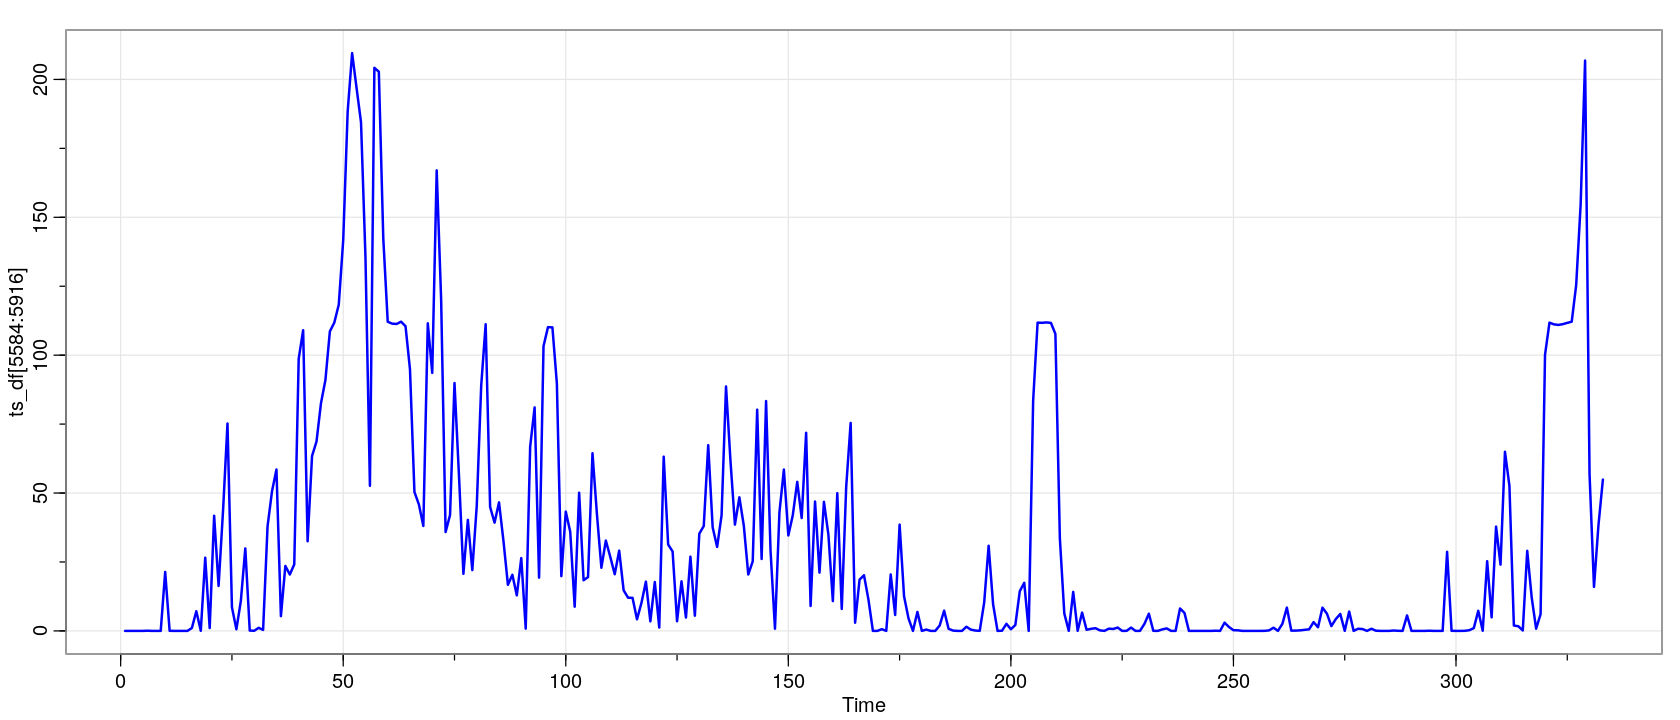

In [9]:
# dias 19 al 21 de mayo (arranca en 18*288=5184)
tsplot(ts_df[5584:5916], col=4, lwd=2)

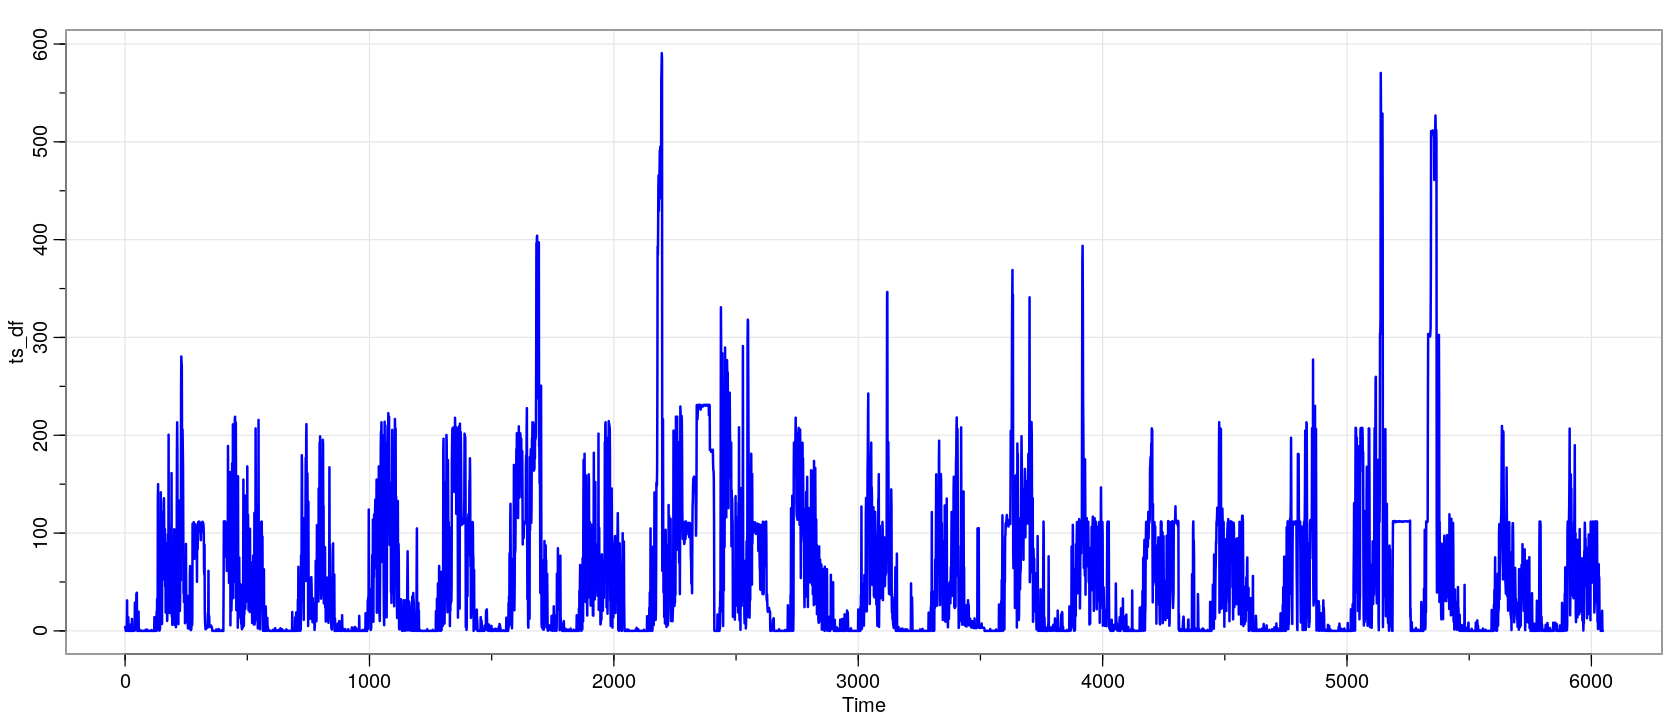

In [10]:
tsplot(ts_df, col=4, lwd=2)

In [11]:

train_predict <- function(start_train, start_test, time_series) {
    
    ret = c(0,0)
    
    ts_length = length(time_series)        
    
    end_train = start_test - 1

    ts_df_train = ts(time_series[start_train:end_train], start=start_train-1, frequency=1)
    ts_df_test = ts(time_series[start_test:ts_length], start=start_test-1, frequency=1)
    
    dn = ts_df_train
    dnt = ts_df_test
    
    # nuevos datos para prediccion
    new_t = seq(start_test-1,start_test-1,by=1)
    new_t = ts(new_t,start=start_test-1,freq=1)
    new_data = data.frame(t=new_t)
    
    # agrego para probar +1 para evitar log(0)
    ldn = log(dn+1)
    ldnt = log(dnt+1)
    t = time(ldn)
    
    fit = lm(ldn ~ t, na.action=NULL)
    
    #ndata <- data.frame(t = start_test-1)
    ndata <- data.frame(t = new_data)
    
    predict_trend = predict(fit,newdata=ndata)
    
    predicttrend = ts(fitted(fit), start=start_train-1, freq=1)
    
    #ldn = as.numeric(ldn)
    ldnc = ldn-predicttrend
    
    ###
    ldnc = ts(ldn-predicttrend, start=start_train-1, freq=1)
    ### 
    
    t = time(ldnc)

    #f1 =  0.000192
    #f2 =  0.000385
    #f3 =  0.000578
    #f4 =  0.000771
    #f5 =  0.000964
    #f6 =  0.001157
    #f7 =  0.002507
    #f8 =  0.002893
    #f9 =  0.003472
    #f10 = 0.004436
    #f11 = 0.006944
    #f12 = 0.010416    
    
    f1 =  0.003473
    f2 =  0.006946
    f3 =  0.010419

    fit = lm(ldnc ~ 0 + cos(2*pi*f1*t) + sin(2*pi*f1*t) ,
                      cos(2*pi*f2*t) + sin(2*pi*f2*t) +
                     cos(2*pi*f3*t) + sin(2*pi*f3*t) ,
             na.action=NULL)
    
    prediction = ts(fitted(fit), start=start_train-1, freq=1)
    
    #tn = ts_length
    tn = start_test - 1 
            
    v = 0 + cos(2*pi*f1*tn) + sin(2*pi*f1*tn) +
                  cos(2*pi*f2*tn) + sin(2*pi*f2*tn) +
                 cos(2*pi*f3*tn) + sin(2*pi*f3*tn)

    #vdf <- data.frame(t = v)
    
    vdf <- data.frame(t = new_data)
    fore_f = predict(fit, vdf)    

    res = (ts(residuals(fit), start=start_train -1, freq=1))

    ldncr1 = res
        
    fit = Arima(ldncr1, order = c(5,0,0), include.mean=FALSE)
    #fit = Arima(ldncr1, order = c(6,0,0), include.mean=FALSE, 
    #            seasonal = list(order = c(6,0,0), period = 6))
    #fit = Arima(ldncr1, order = c(6,0,6), include.mean=FALSE, 
    #            seasonal = list(order = c(5,0,1), period = 6))
    fore = forecast(fit, h=1)   
    
    ldnt = as.numeric(ldnt)
    
    #e = exp(1)

    ldnt = ts(ldnt, start=start_test -1, frequency=1)    
    
    v_ldnt = ldnt #c + predictiont
    v_pred = fore$mean + fore_f + predict_trend    
    #v_pred = fore_f + predict_trend
    #v_pred = fore_f

    #v_ldnt = (e^v_ldnt) 
    #v_pred = (e^v_pred) -1 
    
    v_ldnt = (exp(v_ldnt)) -1 
    v_pred = (exp(v_pred)) -1 
    
    v_ldnt[1:5]
    v_pred[1:5]
    ret = c(v_ldnt[1], v_pred[1], time(v_ldnt)[1], time(v_pred)[1],fore$mean,fore_f,predict_trend)
    #ret = c(v_ldnt[1], v_pred[1], time(v_ldnt)[1], time(v_pred)[1])
    
    return(ret)
    
}

In [12]:
#testv <- train_predict(6500-6400, 6500, ts_df)
#testv

In [13]:
Sys.time()

[1] "2021-07-24 17:21:40 -03"

In [14]:
start_train = 1
start_test = 5306
# time serie : ts_df
testv <- train_predict(start_train, start_test, ts_df)
print(paste("observed -", "prediction"))
testv

[1] "observed - prediction"


1                                                   1 
   0.0365200    6.2856666 5305.0000000 5305.0000000    0.1400533   -0.8294317 
           1 
   2.6752874

In [15]:
Sys.time()

[1] "2021-07-24 17:21:40 -03"

In [16]:
df_validation <- data.frame(observed=double(), predicted=double(), timeo=integer(), timep=integer())

vect_obs <- c()
vect_pred <- c()

vect_arma <- c()
vect_freq <- c()
vect_tren <- c()
vect_tren_freq <- c()

for (i in (3556:3950)) {   
    print(i)
    #print(paste0("parametros: ", i-5180, " ", i))
    testv <- train_predict(i-3550, i, ts_df)
    print(testv)
    vect_obs <- append(vect_obs, testv[1])
    vect_pred <- append(vect_pred, testv[2])
    vect_arma <- append(vect_arma, testv[5])
    vect_freq <- append(vect_freq, testv[6])
    vect_tren <- append(vect_tren, testv[7])
    vect_tren_freq <- append(vect_tren_freq, testv[6]+testv[7])
    
    
    #print(testv)
    df_validation[nrow(df_validation)+1,] = testv
}

[1] 3556
                        1                                                   1 
   0.0000000    0.2300795 3555.0000000 3555.0000000   -1.0249157   -1.5661173 
           1 
   2.7981118 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3557
                        1                                                   1 
   0.0002100    0.2369447 3556.0000000 3556.0000000   -1.0393300   -1.5417299 
           1 
   2.7937043 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3558
                        1                                                   1 
   0.0000000    0.2331326 3557.0000000 3557.0000000   -1.0644847   -1.5161434 
           1 
   2.7901859 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3559
                      1                                               1 
   0.000000    0.222972 3558.000000 3558.000000   -1.096065   -1.489657 
          1 
   2.787006 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3560
                        1                                                   1 
   0.0000000    0.2241771 3559.0000000 3559.0000000   -1.1202099   -1.4620674 
           1 
   2.7845462 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3561
                        1                                                   1 
   0.1083667    0.2290027 3560.0000000 3560.0000000   -1.1402961   -1.4344161 
           1 
   2.7809152 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3562
                      1                                               1 
   0.000000    0.295831 3561.000000 3561.000000   -1.111906   -1.406143 
          1 
   2.777201 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3563
                        1                                                   1 
   0.0000000    0.2627342 3562.0000000 3562.0000000   -1.1619278   -1.3775906 
           1 
   2.7727978 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3564
                        1                                                   1 
   0.0000000    0.2518328 3563.0000000 3563.0000000   -1.1953603   -1.3484140 
           1 
   2.7683830 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3565
                        1                                                   1 
   1.4753633    0.2627953 3564.0000000 3564.0000000   -1.2143832   -1.3177811 
           1 
   2.7654921 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3566
                        1                                                   1 
   0.1262767    0.9421623 3565.0000000 3565.0000000   -0.8127290   -1.2863837 
           1 
   2.7629146 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3567
                        1                                                   1 
   0.0000000    0.5779702 3566.0000000 3566.0000000   -1.0472070   -1.2552892 
           1 
   2.7586354 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3568
                        1                                                   1 
   0.0000000    0.3663457 3567.0000000 3567.0000000   -1.2185386   -1.2236391 
           1 
   2.7543174 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3569
                          1                                           
 1.133333e-04  4.111661e-01  3.568000e+03  3.568000e+03 -1.214005e+00 
            1             1 
-1.191483e+00  2.749904e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3570
                        1                                                   1 
   0.0000000    0.3535336 3569.0000000 3569.0000000   -1.2839874   -1.1587852 
           1 
   2.7454912 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3571
                        1                                                   1 
   0.0000000    0.2888365 3570.0000000 3570.0000000   -1.3619216   -1.1255102 
           1 
   2.7411716 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3572
                        1                                                   1 
   0.0000000    0.2865421 3571.0000000 3571.0000000   -1.3932011   -1.0917126 
           1 
   2.7368718 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3573
                        1                                                   1 
   0.1103633    0.2922015 3572.0000000 3572.0000000   -1.4186300   -1.0574815 
           1 
   2.7324588 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3574
                        1                                                   1 
   0.0000000    0.3644263 3573.0000000 3573.0000000   -1.3947303   -1.0227078 
           1 
   2.7281721 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3575
                        1                                                   1 
   0.0000000    0.3293778 3574.0000000 3574.0000000   -1.4515186   -0.9875351 
           1 
   2.7237648 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3576
                        1                                                   1 
   0.0000000    0.3175437 3575.0000000 3575.0000000   -1.4934516   -0.9512852 
           1 
   2.7205060 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3577
                        1                                                   1 
  26.9908967    0.3295834 3576.0000000 3576.0000000   -1.5160054   -0.9152228 
           1 
   2.7160939 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3578
                          1                                           
   0.03759000    5.51239126 3577.00000000 3577.00000000    0.03509287 
            1             1 
  -0.87682222    2.71543606 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3579
                        1                                                   1 
   0.0000000    1.5228655 3578.0000000 3578.0000000   -0.9457301   -0.8399386 
           1 
   2.7110640 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3580
                        1                                                   1 
   0.0000000    0.6540801 3579.0000000 3579.0000000   -1.4029626   -0.8018996 
           1 
   2.7081072 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3581
                          1                                           
 2.233333e-04  9.082358e-01  3.580000e+03  3.580000e+03 -1.293235e+00 
            1             1 
-7.642804e-01  2.703695e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3582
                        1                                                   1 
   0.0000000    0.6198128 3581.0000000 3581.0000000   -1.4911532   -0.7261441 
           1 
   2.6996079 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3583
                        1                                                   1 
   0.0000000    0.3553560 3582.0000000 3582.0000000   -1.7033946   -0.6878175 
           1 
   2.6952763 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3584
                        1                                                   1 
   0.0000000    0.3583025 3583.0000000 3583.0000000   -1.7361627   -0.6489601 
           1 
   2.6913585 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3585
                          1                                           
   0.06651667    0.36428544 3584.00000000 3584.00000000   -1.76623274 
            1             1 
  -0.61008331    2.68694686 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3586
                        1                                                   1 
  30.3594767    0.4132389 3585.0000000 3585.0000000   -1.7658183   -0.5709053 
           1 
   2.6826077 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3587
                        1                                                   1 
   1.2365533    6.2273182 3586.0000000 3586.0000000   -0.1746853   -0.5295250 
           1 
   2.6820783 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3588
                        1                                                   1 
  52.0030733    2.8718835 3587.0000000 3587.0000000   -0.8353888   -0.4894462 
           1 
   2.6785761 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3589
                        1                                                   1 
  20.4641333   12.2768708 3588.0000000 3588.0000000    0.3547104   -0.4473283 
           1 
   2.6786413 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3590
                        1                                                   1 
  59.5186900   18.2362603 3589.0000000 3589.0000000    0.6846615   -0.4055491 
           1 
   2.6776846 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3591
                        1                                                   1 
 118.1769467   28.3545745 3590.0000000 3590.0000000    1.0631965   -0.3625203 
           1 
   2.6787723 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3592
                        1                                                   1 
  20.9276933   55.7617715 3591.0000000 3591.0000000    1.6755764   -0.3183684 
           1 
   2.6816550 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3593
                          1                                           
 3.266667e-04  3.250872e+01  3.592000e+03  3.592000e+03  1.106609e+00 
            1             1 
-2.758880e-01  2.681084e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3594
                        1                                                   1 
   0.8265000    5.1662403 3593.0000000 3593.0000000   -0.6235928   -0.2348237 
           1 
   2.6775059 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3595
                        1                                                   1 
  34.2246867    3.7125667 3594.0000000 3594.0000000   -0.9314027   -0.1931894 
           1 
   2.6748248 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3596
                        1                                                   1 
  31.3226200   14.9649074 3595.0000000 3595.0000000    0.2435737   -0.1493669 
           1 
   2.6761862 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3597
                        1                                                   1 
   1.6993333   17.2948741 3596.0000000 3596.0000000    0.3359127   -0.1059525 
           1 
   2.6766607 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3598
                          1                                           
   1.71789333    4.88583057 3597.00000000 3597.00000000   -0.83954479 
            1             1 
  -0.06333334    2.67542600 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3599
                          1                                           
   1.60623333    4.30442621 3598.00000000 3598.00000000   -0.98425831 
            1             1 
  -0.02092808    2.67372799 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3600
                          1                                           
  49.34168000    4.25203236 3599.00000000 3599.00000000   -1.03558988 
            1             1 
   0.02173459    2.67247041 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3601
                        1                                                   1 
5.077638e+01 1.547896e+01 3.600000e+03 3.600000e+03 6.388681e-02 6.523702e-02 
           1 
2.672960e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3602
                        1                                                   1 
  96.7904800   23.8794109 3601.0000000 3601.0000000    0.4326065    0.1084387 
           1 
   2.6729954 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3603
                        1                                                   1 
  97.1630333   39.5319384 3602.0000000 3602.0000000    0.8764208    0.1519274 
           1 
   2.6737421 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3604
                        1                                                   1 
 109.9918900   61.7595945 3603.0000000 3603.0000000    1.2695066    0.1953166 
           1 
   2.6744882 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3605
                        1                                                   1 
 105.2884967   81.8489546 3604.0000000 3604.0000000    1.5029927    0.2386558 
           1 
   2.6753706 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3606
                        1                                                   1 
 110.8028933   88.3821468 3605.0000000 3605.0000000    1.5348908    0.2818283 
           1 
   2.6762020 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3607
                        1                                                   1 
 111.3159533   94.5184754 3606.0000000 3606.0000000    1.5547124    0.3258099 
           1 
   2.6787974 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3608
                        1                                                   1 
 115.4801633   97.0983793 3607.0000000 3607.0000000    1.5375818    0.3687012 
           1 
   2.6796878 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3609
                        1                                                   1 
 118.5078733   99.9875121 3608.0000000 3608.0000000    1.5222591    0.4116625 
           1 
   2.6810752 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3610
                        1                                                   1 
 115.5887367  102.7200061 3609.0000000 3609.0000000    1.5054929    0.4541707 
           1 
   2.6820315 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3611
                        1                                                   1 
 108.4283000  103.0681403 3610.0000000 3610.0000000    1.4649363    0.4966802 
           1 
   2.6834294 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3612
                        1                                                   1 
 109.7416033  100.5313568 3611.0000000 3611.0000000    1.3974482    0.5386373 
           1 
   2.6842822 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3613
                        1                                                   1 
 110.5476433  100.7441328 3612.0000000 3612.0000000    1.3569983    0.5803166 
           1 
   2.6851463 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3614
                        1                                                   1 
 110.9092500  101.2740745 3613.0000000 3613.0000000    1.3199444    0.6216955 
           1 
   2.6860162 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3615
                      1                                               1 
 110.107573  101.269796 3614.000000 3614.000000    1.277972    0.662753 
          1 
   2.686889 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3616
                        1                                                   1 
 106.7923300  101.2156247 3615.0000000 3615.0000000    1.2358620    0.7034655 
           1 
   2.6877571 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3617
                        1                                                   1 
 112.0768567  100.2015000 3616.0000000 3616.0000000    1.1847327    0.7437955 
           1 
   2.6885854 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3618
                        1                                                   1 
 113.2063600  102.4584581 3617.0000000 3617.0000000    1.1657177    0.7838477 
           1 
   2.6896047 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3619
                      1                                               1 
 113.414640  104.035810 3618.000000 3618.000000    1.140383    0.823428 
          1 
   2.690490 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3620
                        1                                                   1 
 113.1120167  104.6709198 3619.0000000 3619.0000000    1.1062898    0.8626158 
           1 
   2.6914241 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3621
                        1                                                   1 
 113.4901900  105.3955615 3620.0000000 3620.0000000    1.0734626    0.9013584 
           1 
   2.6923428 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3622
                        1                                                   1 
 109.6708700  106.3435797 3621.0000000 3621.0000000    1.0431855    0.9396248 
           1 
   2.6932244 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3623
                        1                                                   1 
 109.1896933  105.1329313 3622.0000000 3622.0000000    0.9932312    0.9773958 
           1 
   2.6940654 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3624
                        1                                                   1 
 141.7463000  104.6500787 3623.0000000 3623.0000000    0.9505627    1.0146705 
           1 
   2.6948993 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3625
                      1                                               1 
 204.537497  118.749318 3624.000000 3624.000000    1.037666    1.051629 
          1 
   2.696106 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3626
                      1                                               1 
 202.502173  148.499148 3625.000000 3625.000000    1.221428    1.088225 
          1 
   2.697637 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3627
                      1                                               1 
 203.361640  160.627555 3626.000000 3626.000000    1.261870    1.124269 
          1 
   2.699155 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3628
                      1                                               1 
 203.290787  169.334480 3627.000000 3627.000000    1.277337    1.159752 
          1 
   2.700676 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3629
                      1                                               1 
 206.268623  179.210374 3628.000000 3628.000000    1.297279    1.194653 
          1 
   2.702193 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3630
                      1                                               1 
 297.324670  184.789997 3629.000000 3629.000000    1.291928    1.228965 
          1 
   2.703724 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3631
                      1                                               1 
 341.278190  221.563018 3630.000000 3630.000000    1.436673    1.262874 
          1 
   2.705663 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3632
                      1                                               1 
 368.925507  254.042297 3631.000000 3631.000000    1.537443    1.296233 
          1 
   2.707754 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3633
                      1                                               1 
 259.881977  277.740901 3632.000000 3632.000000    1.591363    1.328990 
          1 
   2.709930 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3634
                      1                                               1 
 343.705397  250.281331 3633.000000 3633.000000    1.453956    1.360892 
          1 
   2.711725 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3635
                      1                                               1 
  78.973803  280.506763 3634.000000 3634.000000    1.534070    1.392270 
          1 
   2.713816 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3636
                        1                                                   1 
  64.0870133  145.3698638 3635.0000000 3635.0000000    0.8490704    1.4223592 
           1 
   2.7147071 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3637
                        1                                                   1 
  71.3060000   99.4088108 3636.0000000 3636.0000000    0.4429511    1.4513838 
           1 
   2.7149151 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3638
                        1                                                   1 
  80.5124000   93.1690714 3637.0000000 3637.0000000    0.3501025    1.4797497 
           1 
   2.7152397 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3639
                        1                                                   1 
  81.6864000   86.8245220 3638.0000000 3638.0000000    0.2521917    1.5074518 
           1 
   2.7156972 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3640
                        1                                                   1 
  82.9498367   80.9753340 3639.0000000 3639.0000000    0.1558337    1.5344159 
           1 
   2.7161688 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3641
                        1                                                   1 
 158.1321767   82.4646050 3640.0000000 3640.0000000    0.1471377    1.5606296 
           1 
   2.7166554 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3642
                        1                                                   1 
  23.5143533  115.2724074 3641.0000000 3641.0000000    0.4508946    1.5867043 
           1 
   2.7183369 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3643
                        1                                                   1 
  83.1046033   52.7238052 3642.0000000 3642.0000000   -0.3442346    1.6106585 
           1 
   2.7174323 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3644
                          1                                           
 126.23743000   71.19397028 3643.00000000 3643.00000000   -0.07308985 
            1             1 
   1.63453104    2.71791533 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3645
                        1                                                   1 
 139.9669000  104.3661193 3644.0000000 3644.0000000    0.2807326    1.6578396 
           1 
   2.7188688 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3646
                        1                                                   1 
 123.6291400  108.9477620 3645.0000000 3645.0000000    0.2996899    1.6803861 
           1 
   2.7199294 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3647
                        1                                                   1 
 147.4546800  109.5977366 3646.0000000 3646.0000000    0.2830186    1.7020323 
           1 
   2.7208487 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3648
                        1                                                   1 
 159.4876467  131.8669204 3647.0000000 3647.0000000    0.4443188    1.7229852 
           1 
   2.7220441 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3649
                      1                                               1 
 122.157463  145.440097 3648.000000 3648.000000    0.520282    1.743091 
          1 
   2.723244 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3650
                        1                                                   1 
   3.4630400  130.3867216 3649.0000000 3649.0000000    0.3918182    1.7621841 
           1 
   2.7241427 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3651
                      1                                               1 
  68.383323   24.841891 3650.000000 3650.000000   -1.247793    1.778489 
          1 
   2.721301 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3652
                        1                                                   1 
 191.5741100   52.1080665 3651.0000000 3651.0000000   -0.5447293    1.7955076 
           1 
   2.7215506 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3653
                        1                                                   1 
 122.3480067  112.8252253 3652.0000000 3652.0000000    0.1994829    1.8122331 
           1 
   2.7229482 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3654
                        1                                                   1 
 181.2511700   89.9144805 3653.0000000 3653.0000000   -0.0417309    1.8278089 
           1 
   2.7238413 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3655
                        1                                                   1 
  26.0191067  117.4903919 3654.0000000 3654.0000000    0.2069486    1.8427112 
           1 
   2.7251721 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3656
                        1                                                   1 
  86.8495733   63.5327098 3655.0000000 3655.0000000   -0.4127795    1.8556022 
           1 
   2.7243495 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3657
                        1                                                   1 
  87.9047467   82.7123796 3656.0000000 3656.0000000   -0.1657306    1.8682635 
           1 
   2.7248539 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3658
                          1                                           
  11.14755667   93.01635952 3657.00000000 3657.00000000   -0.06191402 
            1             1 
   1.88001316    2.72536966 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3659
                      1                                               1 
  17.093297   31.766887 3658.000000 3658.000000   -1.124418    1.889867 
          1 
   2.723969 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3660
                      1                                               1 
  57.205990   26.947243 3659.000000 3659.000000   -1.291327    1.898888 
          1 
   2.722758 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3661
                        1                                                   1 
  60.2269867   48.8825511 3660.0000000 3660.0000000   -0.7212214    1.9077875 
           1 
   2.7231051 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3662
                        1                                                   1 
 114.7420967   51.5841151 3661.0000000 3661.0000000   -0.6763927    1.9156123 
           1 
   2.7231946 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3663
                        1                                                   1 
  42.5895300   70.6899969 3662.0000000 3662.0000000   -0.3745128    1.9228645 
           1 
   2.7239995 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3664
                        1                                                   1 
  60.1945967   57.1998487 3663.0000000 3663.0000000   -0.5884258    1.9286067 
           1 
   2.7237019 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3665
                        1                                                   1 
  60.2582700   63.3762749 3664.0000000 3664.0000000   -0.4926376    1.9335980 
           1 
   2.7237847 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3666
                        1                                                   1 
  65.3782833   67.9449497 3665.0000000 3665.0000000   -0.4281986    1.9376402 
           1 
   2.7238668 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3667
                        1                                                   1 
 116.3188300   67.6641880 3666.0000000 3666.0000000   -0.4355867    1.9407771 
           1 
   2.7240373 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3668
                      1                                               1 
 162.719683   88.297379 3667.000000 3667.000000   -0.176166    1.943291 
          1 
   2.724848 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3669
                        1                                                   1 
 199.0671967  117.8328883 3668.0000000 3668.0000000    0.1066449    1.9450423 
           1 
   2.7260310 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3670
                        1                                                   1 
 177.0191200  143.8758590 3669.0000000 3669.0000000    0.3024848    1.9459545 
           1 
   2.7274380 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3671
                        1                                                   1 
 150.1688067  153.2371846 3670.0000000 3670.0000000    0.3639376    1.9458431 
           1 
   2.7287109 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3672
                        1                                                   1 
  92.0944400  150.1216355 3671.0000000 3671.0000000    0.3412355    1.9455238 
           1 
   2.7313258 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3673
                        1                                                   1 
 127.3162900  118.9597830 3672.0000000 3672.0000000    0.1121373    1.9431546 
           1 
   2.7318646 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3674
                        1                                                   1 
  88.0809267  125.8032137 3673.0000000 3673.0000000    0.1698569    1.9400166 
           1 
   2.7327629 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3675
                        1                                                   1 
1.136852e+02 1.056104e+02 3.674000e+03 3.674000e+03 2.193189e-04 1.935714e+00 
           1 
2.733248e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3676
                        1                                                   1 
 111.5978633  107.1335530 3675.0000000 3675.0000000    0.0187451    1.9306071 
           1 
   2.7340149 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3677
                        1                                                   1 
7.267256e+01 1.088819e+02 3.676000e+03 3.676000e+03 4.010594e-02 1.924541e+00 
           1 
2.734759e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3678
                        1                                                   1 
 131.7976700   87.8515459 3677.0000000 3677.0000000   -0.1653392    1.9172828 
           1 
   2.7350233 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3679
                        1                                                   1 
1.254940e+02 1.082845e+02 3.678000e+03 3.678000e+03 4.858151e-02 1.909424e+00 
           1 
2.735949e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3680
                        1                                                   1 
 145.2980267  115.8250592 3679.0000000 3679.0000000    0.1232615    1.9005981 
           1 
   2.7368180 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3681
                        1                                                   1 
 129.5695267  121.8998153 3680.0000000 3680.0000000    0.1799523    1.8918625 
           1 
   2.7395547 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3682
                        1                                                   1 
 142.8235167  121.9631132 3681.0000000 3681.0000000    0.1898017    1.8813663 
           1 
   2.7407164 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3683
                      1                                               1 
 165.604677  130.027226 3682.000000 3682.000000    0.260744    1.870955 
          1 
   2.743706 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3684
                        1                                                   1 
 156.2620767  142.4690915 3683.0000000 3683.0000000    0.3604059    1.8594282 
           1 
   2.7462856 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3685
                        1                                                   1 
  95.6347367  142.2434700 3684.0000000 3684.0000000    0.3684694    1.8470859 
           1 
   2.7489905 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3686
                        1                                                   1 
 136.7920667  112.2209961 3685.0000000 3685.0000000    0.1428004    1.8342273 
           1 
   2.7523139 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3687
                        1                                                   1 
 139.2306867  123.9316580 3686.0000000 3686.0000000    0.2509082    1.8207587 
           1 
   2.7561000 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3688
                        1                                                   1 
 152.9986233  129.5075798 3687.0000000 3687.0000000    0.3064934    1.8059512 
           1 
   2.7589868 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3689
                        1                                                   1 
 142.6147267  131.3066841 3688.0000000 3688.0000000    0.3353635    1.7894338 
           1 
   2.7603253 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3690
                        1                                                   1 
 117.5850867  129.2766212 3689.0000000 3689.0000000    0.3325668    1.7732470 
           1 
   2.7638463 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3691
                        1                                                   1 
 151.9224700  119.5870661 3690.0000000 3690.0000000    0.2715865    1.7552391 
           1 
   2.7655464 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3692
                        1                                                   1 
 136.7572533  131.1973496 3691.0000000 3691.0000000    0.3804379    1.7364581 
           1 
   2.7673999 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3693
                        1                                                   1 
 111.7617267  128.2950139 3692.0000000 3692.0000000    0.3771835    1.7164215 
           1 
   2.7684917 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3694
                      1                                               1 
 109.682963  112.986053 3693.000000 3693.000000    0.268684    1.696353 
          1 
   2.771039 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3695
                        1                                                   1 
 128.0462533  108.3705553 3694.0000000 3694.0000000    0.2475388    1.6748199 
           1 
   2.7723830 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3696
                      1                                               1 
 143.245800  115.340112 3695.000000 3695.000000    0.327239    1.653563 
          1 
   2.775716 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3697
                        1                                                   1 
 181.0010067  121.1832475 3696.0000000 3696.0000000    0.3949604    1.6315253 
           1 
   2.7790363 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3698
                        1                                                   1 
 163.8729033  137.1560604 3697.0000000 3697.0000000    0.5361698    1.6091216 
           1 
   2.7830926 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3699
                        1                                                   1 
 151.8610233  138.4409334 3698.0000000 3698.0000000    0.5651106    1.5857673 
           1 
   2.7867632 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3700
                        1                                                   1 
 113.0125833  135.4848096 3699.0000000 3699.0000000    0.5649395    1.5613816 
           1 
   2.7898922 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3701
                        1                                                   1 
 219.2490800  118.2428177 3700.0000000 3700.0000000    0.4529369    1.5358946 
           1 
   2.7923303 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3702
                        1                                                   1 
 341.0260700  154.7926813 3701.0000000 3701.0000000    0.7414706    1.5105886 
           1 
   2.7964670 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3703
                      1                                               1 
  49.811283  207.247433 3702.000000 3702.000000    1.055089    1.484022 
          1 
   2.799616 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3704
                        1                                                   1 
  61.2544633   88.0948983 3703.0000000 3703.0000000    0.2314102    1.4563628 
           1 
   2.8019291 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3705
                        1                                                   1 
1.022754e+02 7.514570e+01 3.704000e+03 3.704000e+03 9.969627e-02 1.428265e+00 
           1 
2.804687e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3706
                        1                                                   1 
 104.1216067   96.0609794 3705.0000000 3705.0000000    0.3678009    1.3997039 
           1 
   2.8078347 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3707
                        1                                                   1 
 113.0210967   90.8928463 3706.0000000 3706.0000000    0.3394006    1.3704042 
           1 
   2.8108184 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3708
                        1                                                   1 
  99.2895067   87.5680060 3707.0000000 3707.0000000    0.3291631    1.3405856 
           1 
   2.8140219 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3709
                        1                                                   1 
  59.8970733   88.6003680 3708.0000000 3708.0000000    0.3684266    1.3099944 
           1 
   2.8169385 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3710
                        1                                                   1 
 213.5075133   70.3344419 3709.0000000 3709.0000000    0.1689252    1.2787390 
           1 
   2.8197150 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3711
                        1                                                   1 
 201.2886267  119.4733737 3710.0000000 3710.0000000    0.7198638    1.2476370 
           1 
   2.8239280 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3712
                        1                                                   1 
 126.3951167  137.9435414 3711.0000000 3711.0000000    0.8903224    1.2158384 
           1 
   2.8279069 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3713
                        1                                                   1 
  83.2292033  110.8690161 3712.0000000 3712.0000000    0.7033147    1.1830133 
           1 
   2.8310007 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3714
                        1                                                   1 
  88.9873267   90.8023441 3713.0000000 3713.0000000    0.5360721    1.1495908 
           1 
   2.8339749 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3715
                        1                                                   1 
 135.6830967   91.4094768 3714.0000000 3714.0000000    0.5734694    1.1157000 
           1 
   2.8370602 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3716
                        1                                                   1 
   9.2870667  104.6719401 3715.0000000 3715.0000000    0.7388925    1.0812887 
           1 
   2.8401582 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3717
                        1                                                   1 
  12.0593567   28.9954330 3716.0000000 3716.0000000   -0.4844996    1.0449936 
           1 
   2.8405512 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3718
                        1                                                   1 
  83.9805467   20.7183403 3717.0000000 3717.0000000   -0.7703353    1.0079733 
           1 
   2.8405191 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3719
                        1                                                   1 
7.374392e+01 4.864127e+01 3.718000e+03 3.718000e+03 8.985674e-02 9.718480e-01 
           1 
2.843118e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3720
                        1                                                   1 
  31.6153400   50.5044185 3719.0000000 3719.0000000    0.1603687    0.9353868 
           1 
   2.8459121 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3721
                        1                                                   1 
  73.6536500   31.6154835 3720.0000000 3720.0000000   -0.2609822    0.8980120 
           1 
   2.8477573 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3722
                        1                                                   1 
  29.5961167   50.2877822 3721.0000000 3721.0000000    0.2268634    0.8604759 
           1 
   2.8501132 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3723
                        1                                                   1 
  19.9469233   39.2051764 3722.0000000 3722.0000000    0.0203852    0.8220685 
           1 
   2.8515420 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3724
                        1                                                   1 
  27.5948000   26.6245663 3723.0000000 3723.0000000   -0.3156298    0.7826116 
           1 
   2.8517237 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3725
                        1                                                   1 
  29.2574600   28.0350002 3724.0000000 3724.0000000   -0.2271341    0.7431095 
           1 
   2.8525267 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3726
                        1                                                   1 
  59.0691900   28.5442296 3725.0000000 3725.0000000   -0.1715952    0.7035740 
           1 
   2.8539097 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3727
                        1                                                   1 
  58.2995900   37.3916829 3726.0000000 3726.0000000    0.1269721    0.6643584 
           1 
   2.8565103 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3728
                        1                                                   1 
  37.2165067   42.0215202 3727.0000000 3727.0000000    0.2784975    0.6245794 
           1 
   2.8586236 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3729
                        1                                                   1 
  33.3221133   36.0333598 3728.0000000 3728.0000000    0.1669700    0.5843841 
           1 
   2.8604651 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3730
                        1                                                   1 
   5.0065933   33.8395414 3729.0000000 3729.0000000    0.1436991    0.5442213 
           1 
   2.8628325 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3731
                        1                                                   1 
   1.3257367   13.8162710 3730.0000000 3730.0000000   -0.6691809    0.5024111 
           1 
   2.8624958 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3732
                        1                                                   1 
  23.3673133    5.5689677 3731.0000000 3731.0000000   -1.4391543    0.4600382 
           1 
   2.8614729 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3733
                        1                                                   1 
  17.4273100   14.0303028 3732.0000000 3732.0000000   -0.5717590    0.4187933 
           1 
   2.8630341 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3734
                        1                                                   1 
  38.7822600   14.2363008 3733.0000000 3733.0000000   -0.5174823    0.3770923 
           1 
   2.8640709 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3735
                        1                                                   1 
  96.9342267   18.8656892 3734.0000000 3734.0000000   -0.2115856    0.3352941 
           1 
   2.8652856 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3736
                        1                                                   1 
  39.9108100   39.4101551 3735.0000000 3735.0000000    0.5368840    0.2941531 
           1 
   2.8680440 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3737
                        1                                                   1 
   5.7684900   35.7009021 3736.0000000 3736.0000000    0.4811660    0.2521801 
           1 
   2.8694552 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3738
                        1                                                   1 
   0.0000000   13.6938817 3737.0000000 3737.0000000   -0.3910684    0.2092686 
           1 
   2.8692309 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3739
                        1                                                   1 
   5.6962433    3.6022269 3738.0000000 3738.0000000   -1.5051885    0.1650626 
           1 
   2.8666662 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3740
                        1                                                   1 
  11.6146367    6.3864638 3739.0000000 3739.0000000   -0.9892316    0.1221551 
           1 
   2.8667257 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3741
                          1                                           
   7.15765000    8.61423905 3740.00000000 3740.00000000   -0.68344260 
            1             1 
   0.07943837    2.86724947 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3742
                          1                                           
   5.16966000    6.11936904 3741.00000000 3741.00000000   -0.94184431 
            1             1 
   0.03677883    2.86788458 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3743
                          1                                           
 0.000000e+00  5.305620e+00  3.742000e+03  3.742000e+03 -1.018699e+00 
            1             1 
-6.755274e-03  2.866896e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3744
                          1                                           
   5.52919667    1.88362715 3743.00000000 3743.00000000   -1.75462386 
            1             1 
  -0.05092733    2.86460012 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3745
                        1                                                   1 
   7.4091967    4.2705761 3744.0000000 3744.0000000   -1.1064622   -0.0946284 
           1 
   2.8632303 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3746
                          1                                           
   0.04775667    5.77723120 3745.00000000 3745.00000000   -0.81200380 
            1             1 
  -0.13758592    2.86315837 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3747
                        1                                                   1 
  42.5078933    1.3448483 3746.0000000 3746.0000000   -1.8273962   -0.1814761 
           1 
   2.8610931 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3748
                        1                                                   1 
  10.6235167   10.0131411 3747.0000000 3747.0000000   -0.2396753   -0.2235865 
           1 
   2.8623510 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3749
                        1                                                   1 
   0.0672700    9.8308179 3748.0000000 3748.0000000   -0.2138814   -0.2661715 
           1 
   2.8624485 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3750
                          1                                           
   0.06377667    1.88790596 3749.00000000 3749.00000000   -1.48976731 
            1             1 
  -0.30984439    2.86014335 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3751
                        1                                                   1 
   1.5414333    1.1759931 3750.0000000 3750.0000000   -1.7253444   -0.3539428 
           1 
   2.8567724 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3752
                      1                                               1 
  24.508987    2.270382 3751.000000 3751.000000   -1.273645   -0.396826 
          1 
   2.855377 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3753
                        1                                                   1 
   0.1409767    7.4481223 3752.0000000 3752.0000000   -0.2852102   -0.4379072 
           1 
   2.8570616 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3754
                          1                                           
 9.463333e-03  1.370953e+00  3.753000e+03  3.753000e+03 -1.509535e+00 
            1             1 
-4.812180e-01  2.854045e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3755
                        1                                                   1 
   0.1013900    0.6931858 3754.0000000 3754.0000000   -1.7994160   -0.5245459 
           1 
   2.8505737 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3756
                        1                                                   1 
   2.6658900    0.8834624 3755.0000000 3755.0000000   -1.6482785   -0.5669510 
           1 
   2.8483413 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3757
                        1                                                   1 
   0.4683933    1.9432980 3756.0000000 3756.0000000   -1.1587542   -0.6086609 
           1 
   2.8469458 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3758
                        1                                                   1 
  71.7810867    0.8143556 3757.0000000 3757.0000000   -1.5985754   -0.6504663 
           1 
   2.8447720 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3759
                        1                                                   1 
 111.7827967   10.3908313 3758.0000000 3758.0000000    0.2753654   -0.6896431 
           1 
   2.8470865 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3760
                        1                                                   1 
  98.6111933   27.4702064 3759.0000000 3759.0000000    1.2290256   -0.7288788 
           1 
   2.8487113 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3761
                          1                                           
 4.173333e-03  3.548661e+01  3.760000e+03  3.760000e+03  1.512658e+00 
            1             1 
-7.671600e-01  2.851448e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3762
                        1                                                   1 
   0.0000000    4.2717372 3761.0000000 3761.0000000   -0.3780270   -0.8080415 
           1 
   2.8484285 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3763
                        1                                                   1 
  13.4665467    2.3928092 3762.0000000 3762.0000000   -0.7766108   -0.8480400 
           1 
   2.8463091 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3764
                        1                                                   1 
   0.6678067    8.8250286 3763.0000000 3763.0000000    0.3230700   -0.8858091 
           1 
   2.8476722 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3765
                          1                                           
   0.06931667    2.16917582 3764.00000000 3764.00000000   -0.76889621 
            1             1 
  -0.92432743    2.84669521 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3766
                        1                                                   1 
   0.0000000    0.5467935 3765.0000000 3765.0000000   -1.4462657   -0.9626812 
           1 
   2.8451310 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3767
                        1                                                   1 
   0.0000000    0.6007758 3766.0000000 3766.0000000   -1.3707016   -1.0011965 
           1 
   2.8423865 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3768
                        1                                                   1 
   0.4098533    0.4696590 3767.0000000 3767.0000000   -1.4166641   -1.0387730 
           1 
   2.8404675 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3769
                          1                                           
   0.03523333    0.42203305 3768.00000000 3768.00000000   -1.40963464 
            1             1 
  -1.07619497    2.83791718 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3770
                        1                                                   1 
   0.0827800    0.2374138 3769.0000000 3769.0000000   -1.5079950   -1.1135358 
           1 
   2.8345543 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3771
                        1                                                   1 
   0.0000000    0.2201259 3770.0000000 3770.0000000   -1.4839574   -1.1496167 
           1 
   2.8325282 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3772
                        1                                                   1 
   3.3171767    0.1970131 3771.0000000 3771.0000000   -1.4658891   -1.1850057 
           1 
   2.8307242 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3773
                          1                                           
 1.233333e-04  1.411969e+00  3.772000e+03  3.772000e+03 -7.296268e-01 
            1             1 
-1.219506e+00  2.829576e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3774
                        1                                                   1 
   0.3902100    0.4412161 3773.0000000 3773.0000000   -1.2078963   -1.2539575 
           1 
   2.8273411 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3775
                        1                                                   1 
   2.4511667    0.4569704 3774.0000000 3774.0000000   -1.1611572   -1.2877312 
           1 
   2.8252476 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3776
                        1                                                   1 
   0.0000000    1.5358417 3775.0000000 3775.0000000   -0.5727272   -1.3205568 
           1 
   2.8238096 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3777
                      1                                               1 
   0.734330    0.540519 3776.000000 3776.000000   -1.035750   -1.353338 
          1 
   2.821207 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3778
                        1                                                   1 
   6.3759233    0.6345406 3777.0000000 3777.0000000   -0.9438503   -1.3847437 
           1 
   2.8199558 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3779
                          1                                           
   1.15579333    2.78160608 3778.00000000 3778.00000000   -0.07523393 
            1             1 
  -1.41474415    2.82012689 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3780
                        1                                                   1 
  76.2322033    1.5103258 3779.0000000 3779.0000000   -0.4533664   -1.4448950 
           1 
   2.8186740 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3781
                        1                                                   1 
   0.7518033   11.6884813 3780.0000000 3780.0000000    1.1903622   -1.4717918 
           1 
   2.8221242 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3782
                          1                                           
   0.95432333    2.93101196 3781.00000000 3781.00000000    0.04761969 
            1             1 
  -1.50010674    2.82138394 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3783
                        1                                                   1 
   0.3462867    1.7276841 3782.0000000 3782.0000000   -0.2896851   -1.5276178 
           1 
   2.8207559 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3784
                        1                                                   1 
   0.0000000    1.4211883 3783.0000000 3783.0000000   -0.3808609   -1.5545864 
           1 
   2.8197058 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3785
                          1                                           
   0.09609333    0.74241523 3784.00000000 3784.00000000   -0.68178249 
            1             1 
  -1.58106533    2.81812003 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3786
                        1                                                   1 
   0.2744967    0.3048681 3785.0000000 3785.0000000   -0.9439038   -1.6066823 
           1 
   2.8166881 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3787
                        1                                                   1 
   0.5613333    0.3573326 3786.0000000 3786.0000000   -0.8784893   -1.6314169 
           1 
   2.8154277 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3788
                        1                                                   1 
   0.0353900    0.4570380 3787.0000000 3787.0000000   -0.7826839   -1.6552559 
           1 
   2.8143453 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3789
                        1                                                   1 
   3.5064933    0.2256509 3788.0000000 3788.0000000   -0.9307175   -1.6785498 
           1 
   2.8127393 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3790
                      1                                               1 
   0.019300    1.434318 3789.000000 3789.000000   -0.222602   -1.700292 
          1 
   2.812561 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3791
                        1                                                   1 
   0.5666233    0.4999908 3790.0000000 3790.0000000   -0.6822840   -1.7223838 
           1 
   2.8101268 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3792
                        1                                                   1 
   1.9385133    0.5455086 3791.0000000 3791.0000000   -0.6296641   -1.7433109 
           1 
   2.8083280 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3793
                        1                                                   1 
   3.4442667    1.3176623 3792.0000000 3792.0000000   -0.2031897   -1.7631926 
           1 
   2.8069413 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3794
                        1                                                   1 
   1.0807767    2.0820895 3793.0000000 3793.0000000    0.1013833   -1.7819187 
           1 
   2.8061432 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3795
                        1                                                   1 
   0.2107533    1.2154139 3794.0000000 3794.0000000   -0.2094334   -1.8000085 
           1 
   2.8048812 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3796
                        1                                                   1 
   4.2388167    0.6918216 3795.0000000 3795.0000000   -0.4596755   -1.8175331 
           1 
   2.8030144 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3797
                        1                                                   1 
   2.0735533    2.3058893 3796.0000000 3796.0000000    0.2281121   -1.8339934 
           1 
   2.8015868 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3798
                        1                                                   1 
   3.9728133    1.9783065 3797.0000000 3797.0000000    0.1408261   -1.8495861 
           1 
   2.8001149 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3799
                        1                                                   1 
   6.2171300    2.3822870 3798.0000000 3798.0000000    0.2825261   -1.8637097 
           1 
   2.7997357 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3800
                        1                                                   1 
   3.7869300    3.7464863 3799.0000000 3799.0000000    0.6351323   -1.8769944 
           1 
   2.7992667 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3801
                          1                                           
   0.05087333    3.46294569 3800.00000000 3800.00000000    0.58598267 
            1             1 
  -1.88922235    2.79904869 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3802
                        1                                                   1 
   1.7553133    1.0554783 3801.0000000 3801.0000000   -0.1741637   -1.9017782 
           1 
   2.7964505 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3803
                        1                                                   1 
   0.5107467    1.7056457 3802.0000000 3802.0000000    0.1130372   -1.9127817 
           1 
   2.7950851 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3804
                        1                                                   1 
   0.8350133    1.1144088 3803.0000000 3803.0000000   -0.1199592   -1.9236013 
           1 
   2.7923357 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3805
                        1                                                   1 
   7.3925267    0.8655176 3804.0000000 3804.0000000   -0.2334944   -1.9331737 
           1 
   2.7902066 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3806
                        1                                                   1 
  12.7401100    2.8685202 3805.0000000 3805.0000000    0.5041344   -1.9409806 
           1 
   2.7897182 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3807
                      1                                               1 
   7.814790    5.428820 3806.000000 3806.000000    1.017946   -1.947349 
          1 
   2.790194 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3808
                        1                                                   1 
   5.6873767    5.0105097 3807.0000000 3807.0000000    0.9573263   -1.9533737 
           1 
   2.7895570 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3809
                        1                                                   1 
   2.9415300    4.9559079 3808.0000000 3808.0000000    0.9554555   -1.9590023 
           1 
   2.7879305 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3810
                        1                                                   1 
   0.0000000    4.0101240 3809.0000000 3809.0000000    0.7888765   -1.9636997 
           1 
   2.7862839 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3811
                          1                                           
   0.00000000    1.28540108 3810.00000000 3810.00000000    0.01267546 
            1             1 
  -1.96860207    2.78246814 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3812
                        1                                                   1 
   0.0000000    0.6738341 3811.0000000 3811.0000000   -0.2919438   -1.9722294 
           1 
   2.7792900 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3813
                          1                                           
   0.06362667    0.43431706 3812.00000000 3812.00000000   -0.44109615 
            1             1 
  -1.97470897    2.77649394 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3814
                        1                                                   1 
   0.0000000    0.2426659 3813.0000000 3813.0000000   -0.5800321   -1.9763030 
           1 
   2.7735941 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3815
                        1                                                   1 
   0.0000000    0.1070018 3814.0000000 3814.0000000   -0.6915617   -1.9771384 
           1 
   2.7703554 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3816
                        1                                                   1 
   0.0000000    0.1017144 3815.0000000 3815.0000000   -0.6933317   -1.9769937 
           1 
   2.7671929 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3817
                        1                                                   1 
  20.7864733    0.1059375 3816.0000000 3816.0000000   -0.6888918   -1.9753890 
           1 
   2.7649743 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3818
                        1                                                   1 
   2.9777367    3.9939921 3817.0000000 3817.0000000    0.8129154   -1.9709958 
           1 
   2.7663161 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3819
                        1                                                   1 
   1.9177800    2.5801972 3818.0000000 3818.0000000    0.4765663   -1.9667232 
           1 
   2.7655748 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3820
                        1                                                   1 
   2.6986867    1.8326729 3819.0000000 3819.0000000    0.2412066   -1.9626710 
           1 
   2.7626852 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3821
                          1                                           
 9.333333e-05  2.725766e+00  3.820000e+03  3.820000e+03  5.129089e-01 
            1             1 
-1.957614e+00  2.759977e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3822
                          1                                           
 1.053333e-03  1.082997e+00  3.821000e+03  3.821000e+03 -6.983196e-02 
            1             1 
-1.952314e+00  2.755954e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3823
                        1                                                   1 
   0.0000000    0.4788464 3822.0000000 3822.0000000   -0.4147948   -1.9460222 
           1 
   2.7520793 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3824
                        1                                                   1 
   0.0000000    0.3665912 3823.0000000 3823.0000000   -0.4987642   -1.9382153 
           1 
   2.7492990 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3825
                          1                                           
   0.06854333    0.22285312 3824.00000000 3824.00000000   -0.61484744 
            1             1 
  -1.92983718    2.74587137 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3826
                        1                                                   1 
   0.0000000    0.1559333 3825.0000000 3825.0000000   -0.6771020   -1.9205087 
           1 
   2.7425188 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3827
                        1                                                   1 
   0.0001200    0.1335234 3826.0000000 3826.0000000   -0.7040331   -1.9101039 
           1 
   2.7394678 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3828
                        1                                                   1 
   1.3481733    0.1293021 3827.0000000 3827.0000000   -0.7179014   -1.8981236 
           1 
   2.7376249 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3829
                        1                                                   1 
   0.0000000    0.7216244 3828.0000000 3828.0000000   -0.3087022   -1.8847410 
           1 
   2.7367115 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3830
                        1                                                   1 
   8.1742267    0.3060904 3829.0000000 3829.0000000   -0.5968646   -1.8709334 
           1 
   2.7348363 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3831
                        1                                                   1 
  16.5598500    2.5286090 3830.0000000 3830.0000000    0.3803858   -1.8549339 
           1 
   2.7354519 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3832
                      1                                               1 
   0.000000    6.203401 3831.000000 3831.000000    1.075447   -1.837668 
          1 
   2.736774 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3833
                        1                                                   1 
   5.7964033    1.2313343 3832.0000000 3832.0000000   -0.1112274   -1.8211199 
           1 
   2.7349471 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3834
                        1                                                   1 
  17.9582633    3.3751897 3833.0000000 3833.0000000    0.5432621   -1.8025799 
           1 
   2.7352677 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3835
                      1                                               1 
  19.186793    9.176416 3834.000000 3834.000000    1.366227   -1.782684 
          1 
   2.736529 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3836
                      1                                               1 
  18.458107   10.134915 3835.000000 3835.000000    1.433807   -1.761777 
          1 
   2.738056 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3837
                          1                                           
   0.09147333   10.77760075 3836.00000000 3836.00000000    1.46664666 
            1             1 
  -1.74001582    2.73956864 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3838
                        1                                                   1 
   2.8712533    2.6615184 3837.0000000 3837.0000000    0.2791516   -1.7190845 
           1 
   2.7378109 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3839
                        1                                                   1 
   4.2766967    3.6215664 3838.0000000 3838.0000000    0.4898011   -1.6965682 
           1 
   2.7375008 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3840
                        1                                                   1 
   0.0008100    4.4861911 3839.0000000 3839.0000000    0.6377267   -1.6730388 
           1 
   2.7375463 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3841
                        1                                                   1 
   0.1838700    1.1052973 3840.0000000 3840.0000000   -0.3415919   -1.6496588 
           1 
   2.7357074 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3842
                          1                                           
   0.04675667    0.65464098 3841.00000000 3841.00000000   -0.60498405 
            1             1 
  -1.62541492    2.73398302 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3843
                        1                                                   1 
   0.0000000    0.6204396 3842.0000000 3842.0000000   -0.6490984   -1.6004037 
           1 
   2.7321995 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3844
                        1                                                   1 
   0.0000000    0.3710056 3843.0000000 3843.0000000   -0.8401510   -1.5746469 
           1 
   2.7303423 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3845
                          1                                           
 1.133333e-04  2.265829e-01  3.844000e+03  3.844000e+03 -9.760997e-01 
            1             1 
-1.548131e+00  2.728463e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3846
                        1                                                   1 
   0.0000000    0.2275171 3845.0000000 3845.0000000   -1.0001632   -1.5210588 
           1 
   2.7262155 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3847
                        1                                                   1 
   0.0000000    0.2169598 3846.0000000 3846.0000000   -1.0349601   -1.4930363 
           1 
   2.7243523 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3848
                        1                                                   1 
   0.0000000    0.2186873 3847.0000000 3847.0000000   -1.0605018   -1.4642571 
           1 
   2.7225332 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3849
                          1                                           
   0.08450667    0.22416461 3848.00000000 3848.00000000   -1.08348433 
            1             1 
  -1.43483383    2.72057682 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3850
                        1                                                   1 
   0.0000000    0.2794442 3849.0000000 3849.0000000   -1.0677724   -1.4046084 
           1 
   2.7188066 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3851
                      1                                               1 
   0.000000    0.252016 3850.000000 3850.000000   -1.118555   -1.373702 
          1 
   2.717012 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3852
                        1                                                   1 
   0.0000000    0.2484067 3851.0000000 3851.0000000   -1.1511562   -1.3421460 
           1 
   2.7151703 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3853
                        1                                                   1 
   0.1518233    0.2576683 3852.0000000 3852.0000000   -1.1742253   -1.3098983 
           1 
   2.7133831 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3854
                        1                                                   1 
   0.9481800    0.3510433 3853.0000000 3853.0000000   -1.1339571   -1.2769218 
           1 
   2.7117560 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3855
                        1                                                   1 
   0.0000000    0.7846348 3854.0000000 3854.0000000   -0.8885028   -1.2430082 
           1 
   2.7107249 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3856
                      1                                               1 
   0.000000    0.423998 3855.000000 3855.000000   -1.146526   -1.208895 
          1 
   2.708890 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3857
                        1                                                   1 
   0.0001100    0.3497912 3856.0000000 3856.0000000   -1.2329284   -1.1741813 
           1 
   2.7070596 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3858
                        1                                                   1 
   0.0000000    0.3794303 3857.0000000 3857.0000000   -1.2446938   -1.1388791 
           1 
   2.7052434 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3859
                      1                                               1 
   0.000000    0.347889 3858.000000 3858.000000   -1.301931   -1.102992 
          1 
   2.703464 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3860
                          1                                           
   0.03041667    0.29354820 3859.00000000 3859.00000000   -1.37774008 
            1             1 
  -1.06655663    2.70168570 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3861
                          1                                           
   0.06122333    0.31959233 3860.00000000 3860.00000000   -1.39300322 
            1             1 
  -1.02958803    2.69991410 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3862
                        1                                                   1 
   0.0000000    0.3521520 3861.0000000 3861.0000000   -1.4042863   -0.9921262 
           1 
   2.6981099 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3863
                        1                                                   1 
   0.0000000    0.3296098 3862.0000000 3862.0000000   -1.4573009   -0.9541510 
           1 
   2.6963373 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3864
                        1                                                   1 
   0.2094367    0.3305496 3863.0000000 3863.0000000   -1.4932504   -0.9157070 
           1 
   2.6945495 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3865
                        1                                                   1 
  25.0239367    0.4692582 3864.0000000 3864.0000000   -1.4315585   -0.8766822 
           1 
   2.6929983 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3866
                          1                                           
   0.16241333    5.77136829 3865.00000000 3865.00000000    0.05326033 
            1             1 
  -0.83544834    2.69489118 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3867
                        1                                                   1 
   0.5594467    1.4824015 3866.0000000 3866.0000000   -0.9884135   -0.7956105 
           1 
   2.6932504 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3868
                        1                                                   1 
   0.2441533    1.1801230 3867.0000000 3867.0000000   -1.1573951   -0.7551885 
           1 
   2.6919649 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3869
                        1                                                   1 
   0.1282800    1.2871459 3868.0000000 3868.0000000   -1.1486540   -0.7144978 
           1 
   2.6904565 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3870
                        1                                                   1 
   0.2595433    0.9737927 3869.0000000 3869.0000000   -1.3353580   -0.6735084 
           1 
   2.6888234 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3871
                        1                                                   1 
   1.2651833    0.6813494 3870.0000000 3870.0000000   -1.5356265   -0.6321046 
           1 
   2.6873277 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3872
                        1                                                   1 
   8.8516333    1.2712355 3871.0000000 3871.0000000   -1.2761239   -0.5900401 
           1 
   2.6864880 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3873
                        1                                                   1 
  12.7406167    4.0387773 3872.0000000 3872.0000000   -0.5233022   -0.5468274 
           1 
   2.6872930 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3874
                        1                                                   1 
  86.2083800    6.8807031 3873.0000000 3873.0000000   -0.1208597   -0.5031594 
           1 
   2.6884362 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3875
                        1                                                   1 
  19.9876833   23.1615422 3874.0000000 3874.0000000    0.9516643   -0.4583037 
           1 
   2.6914016 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3876
                        1                                                   1 
  47.9583467   19.0417418 3875.0000000 3875.0000000    0.7191575   -0.4140603 
           1 
   2.6927200 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3877
                        1                                                   1 
  18.8610200   30.1467775 3876.0000000 3876.0000000    1.1124664   -0.3689836 
           1 
   2.6952280 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3878
                        1                                                   1 
  40.6451700   24.8898400 3877.0000000 3877.0000000    0.8826801   -0.3247004 
           1 
   2.6958709 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3879
                        1                                                   1 
 108.4109967   32.6813846 3878.0000000 3878.0000000    1.0999542   -0.2800168 
           1 
   2.6970078 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3880
                        1                                                   1 
  73.5067133   55.5559591 3879.0000000 3879.0000000    1.5710870   -0.2348011 
           1 
   2.6989447 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3881
                        1                                                   1 
  19.6531567   55.3242183 3880.0000000 3880.0000000    1.5211426   -0.1899742 
           1 
   2.6999563 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3882
                        1                                                   1 
   2.8858067   29.7219440 3881.0000000 3881.0000000    0.8712807   -0.1458191 
           1 
   2.6995156 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3883
                          1                                           
  34.42063333   11.59415848 3882.00000000 3882.00000000   -0.06195217 
            1             1 
  -0.10237499    2.69756025 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3884
                          1                                           
   0.15562667   25.84974350 3883.00000000 3883.00000000    0.64998434 
            1             1 
  -0.05768706    2.69795898 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3885
                          1                                           
   0.11681333    4.68198699 3884.00000000 3884.00000000   -0.94219963 
            1             1 
  -0.01497735    2.69447798 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3886
                          1                                           
   0.90133333    1.88820704 3885.00000000 3885.00000000   -1.65803343 
            1             1 
   0.02770872    2.69096062 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3887
                        1                                                   1 
   0.5074067    2.3005555 3886.0000000 3886.0000000   -1.5646339    0.0706790 
           1 
   2.6880457 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3888
                        1                                                   1 
   0.8872633    1.6902573 3887.0000000 3887.0000000   -1.8087256    0.1134777 
           1 
   2.6848847 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3889
                        1                                                   1 
  44.0708333    1.3756323 3888.0000000 3888.0000000   -1.9731318    0.1563682 
           1 
   2.6820273 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3890
                        1                                                   1 
  63.9402267   10.9488901 3889.0000000 3889.0000000   -0.4032321    0.2010509 
           1 
   2.6828195 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3891
                        1                                                   1 
  15.3391533   23.7280333 3890.0000000 3890.0000000    0.2768986    0.2462576 
           1 
   2.6847814 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3892
                        1                                                   1 
  88.7208200   15.6772060 3891.0000000 3891.0000000   -0.1605764    0.2901541 
           1 
   2.6844652 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3893
                        1                                                   1 
  78.1665000   42.5793631 3892.0000000 3892.0000000    0.7514825    0.3356511 
           1 
   2.6874501 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3894
                        1                                                   1 
  63.8998700   61.9566995 3893.0000000 3893.0000000    1.0723603    0.3805277 
           1 
   2.6895592 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3895
                        1                                                   1 
  97.4768167   55.5196900 3894.0000000 3894.0000000    0.9190885    0.4247363 
           1 
   2.6907644 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3896
                        1                                                   1 
 111.2853900   71.1365545 3895.0000000 3895.0000000    1.1161423    0.4693315 
           1 
   2.6930871 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3897
                        1                                                   1 
 111.0978500   88.8943692 3896.0000000 3896.0000000    1.2903099    0.5134215 
           1 
   2.6949040 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3898
                        1                                                   1 
  98.8587533   91.2873497 3897.0000000 3897.0000000    1.2709368    0.5572546 
           1 
   2.6967157 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3899
                        1                                                   1 
  38.4459067   89.8960464 3898.0000000 3898.0000000    1.2105683    0.6007477 
           1 
   2.6984004 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3900
                        1                                                   1 
  99.0131133   58.2959387 3899.0000000 3899.0000000    0.7401005    0.6434055 
           1 
   2.6990348 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3901
                        1                                                   1 
 111.1511833   79.8374185 3900.0000000 3900.0000000    1.0054320    0.6862876 
           1 
   2.7007204 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3902
                        1                                                   1 
  40.4071100   91.7431576 3901.0000000 3901.0000000    1.0983544    0.7289155 
           1 
   2.7025639 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3903
                        1                                                   1 
 111.3236033   55.4331605 3902.0000000 3902.0000000    0.5589876    0.7706725 
           1 
   2.7033968 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3904
                        1                                                   1 
 110.1646200   80.5608232 3903.0000000 3903.0000000    0.8835735    0.8125580 
           1 
   2.7052175 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3905
                        1                                                   1 
 114.2507967   95.0953187 3904.0000000 3904.0000000    1.0042932    0.8540341 
           1 
   2.7070134 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3906
                        1                                                   1 
 110.1829833   95.0195446 3905.0000000 3905.0000000    0.9605902    0.8951137 
           1 
   2.7088479 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3907
                        1                                                   1 
  97.0746933   97.3505014 3906.0000000 3906.0000000    0.9421571    0.9357374 
           1 
   2.7106431 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3908
                        1                                                   1 
  22.9518100   97.6938408 3907.0000000 3907.0000000    0.9043727    0.9756626 
           1 
   2.7119872 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3909
                        1                                                   1 
  41.0816733   47.9437184 3908.0000000 3908.0000000    0.1655807    1.0139563 
           1 
   2.7111340 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3910
                      1                                               1 
 111.685663   50.062295 3909.000000 3909.000000    0.170066    1.052066 
          1 
   2.710914 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3911
                        1                                                   1 
  95.3239200   80.2716516 3910.0000000 3910.0000000    0.5957773    1.0902174 
           1 
   2.7118025 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3912
                        1                                                   1 
 103.4073467   78.6392454 3911.0000000 3911.0000000    0.5372642    1.1277310 
           1 
   2.7125118 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3913
                      1                                               1 
  79.301697   82.503946 3912.000000 3912.000000    0.546766    1.164759 
          1 
   2.713369 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3914
                        1                                                   1 
 109.1423633   83.2787355 3913.0000000 3913.0000000    0.5192397    1.2010210 
           1 
   2.7138689 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3915
                        1                                                   1 
 110.5240767   98.8124174 3914.0000000 3914.0000000    0.6517031    1.2368664 
           1 
   2.7147231 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3916
                        1                                                   1 
 113.2196267  102.9113568 3915.0000000 3915.0000000    0.6558186    1.2721122 
           1 
   2.7156074 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3917
                        1                                                   1 
 247.5249733  104.8252198 3916.0000000 3916.0000000    0.6385628    1.3067283 
           1 
   2.7164978 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3918
                      1                                               1 
 378.695477  156.817926 3917.000000 3917.000000    1.002036    1.341144 
          1 
   2.718262 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3919
                      1                                               1 
 393.710557  224.632989 3918.000000 3918.000000    1.323270    1.375139 
          1 
   2.720501 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3920
                      1                                               1 
 347.013830  259.974796 3919.000000 3919.000000    1.433170    1.408472 
          1 
   2.722781 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3921
                      1                                               1 
 237.517460  274.117036 3920.000000 3920.000000    1.451246    1.441034 
          1 
   2.724916 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3922
                      1                                               1 
 206.120340  246.004010 3921.000000 3921.000000    1.310119    1.472663 
          1 
   2.726623 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3923
                      1                                               1 
 166.521617  221.648946 3922.000000 3922.000000    1.173948    1.503480 
          1 
   2.728168 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3924
                        1                                                   1 
  64.3885400  189.0620096 3923.0000000 3923.0000000    0.9844479    1.5334310 
           1 
   2.7294716 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3925
                        1                                                   1 
 121.8881700  109.3665938 3924.0000000 3924.0000000    0.4112107    1.5623649 
           1 
   2.7302319 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3926
                        1                                                   1 
  76.5148567  121.8597209 3925.0000000 3925.0000000    0.4892452    1.5906158 
           1 
   2.7311822 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3927
                        1                                                   1 
  87.0235067   98.2396038 3926.0000000 3926.0000000    0.2481117    1.6178144 
           1 
   2.7316111 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3928
                        1                                                   1 
  56.5300467   91.4230366 3927.0000000 3927.0000000    0.1498784    1.6442984 
           1 
   2.7321994 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3929
                        1                                                   1 
 175.4983600   73.5079575 3928.0000000 3928.0000000   -0.0910976    1.6697154 
           1 
   2.7322881 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3930
                      1                                               1 
 130.851037  119.920612 3929.000000 3929.000000    0.366538    1.694958 
          1 
   2.733638 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3931
                      1                                               1 
  37.021150  119.188903 3930.000000 3930.000000    0.335211    1.719197 
          1 
   2.734657 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3932
                        1                                                   1 
 115.4385400   64.4136152 3931.0000000 3931.0000000   -0.2954106    1.7418689 
           1 
   2.7342721 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3933
                        1                                                   1 
1.111463e+02 9.735692e+01 3.932000e+03 3.932000e+03 8.911431e-02 1.764335e+00 
           1 
2.735153e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3934
                        1                                                   1 
 111.4713967  110.1528356 3933.0000000 3933.0000000    0.1890149    1.7859076 
           1 
   2.7359836 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3935
                        1                                                   1 
 100.8924567  103.1071384 3934.0000000 3934.0000000    0.1010535    1.8069405 
           1 
   2.7374266 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3936
                        1                                                   1 
1.152859e+02 1.009219e+02 3.935000e+03 3.935000e+03 5.936037e-02 1.826702e+00 
           1 
2.738145e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3937
                        1                                                   1 
 108.3692033  113.6350233 3936.0000000 3936.0000000    0.1569874    1.8456825 
           1 
   2.7390835 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3938
                        1                                                   1 
 106.6263100  111.7463616 3937.0000000 3937.0000000    0.1215828    1.8636810 
           1 
   2.7398769 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3939
                        1                                                   1 
9.290996e+01 1.098163e+02 3.938000e+03 3.938000e+03 8.646917e-02 1.880755e+00 
           1 
2.740650e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3940
                        1                                                   1 
6.589657e+01 1.027268e+02 3.939000e+03 3.939000e+03 3.628753e-03 1.896839e+00 
           1 
2.741292e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3941
                        1                                                   1 
 111.2538167   85.2024341 3940.0000000 3940.0000000   -0.1966095    1.9117825 
           1 
   2.7415254 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3942
                          1                                           
 111.54047667  102.56020740 3941.00000000 3941.00000000   -0.02827331 
            1             1 
   1.92608685    2.74233962 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3943
                        1                                                   1 
8.819973e+01 1.075786e+02 3.942000e+03 3.942000e+03 4.873140e-03 1.939447e+00 
           1 
2.743154e+00 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3944
                      1                                               1 
  50.763690   95.393530 3943.000000 3943.000000   -0.126987    1.951721 
          1 
   2.743705 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3945
                        1                                                   1 
  49.3090233   72.2863623 3944.0000000 3944.0000000   -0.4119881    1.9627222 
           1 
   2.7436404 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3946
                        1                                                   1 
  84.9899233   66.4012046 3945.0000000 3945.0000000   -0.5056229    1.9727440 
           1 
   2.7435418 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3947
                        1                                                   1 
   6.5095100   81.1158193 3946.0000000 3946.0000000   -0.3186072    1.9823160 
           1 
   2.7444218 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3948
                      1                                               1 
  67.078670   24.466957 3947.000000 3947.000000   -1.494309    1.989379 
          1 
   2.742312 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3949
                        1                                                   1 
  66.0089133   49.2396295 3948.0000000 3948.0000000   -0.8224159    1.9966704 
           1 
   2.7425496 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


[1] 3950
                        1                                                   1 
   7.4094200   62.2381783 3949.0000000 3949.0000000   -0.5988329    2.0029737 
           1 
   2.7427674 


Warning message in matrix(value, n, p):
“la longitud de los datos [7] no es un submúltiplo o múltiplo del número de columnas [4] en la matriz”


In [17]:
Sys.time()

[1] "2021-07-24 17:22:49 -03"

In [18]:
#vect_obs

In [19]:
#vect_pred

In [20]:
#df_validation
rmse(vect_obs, vect_pred)

[1] 40.92808

In [21]:
summary(df_validation)

    observed          predicted            timeo          timep     
 Min.   :  0.0000   Min.   :  0.1017   Min.   :3555   Min.   :3555  
 1st Qu.:  0.2518   1st Qu.:  1.2234   1st Qu.:3654   1st Qu.:3654  
 Median : 29.5961   Median : 24.8419   Median :3752   Median :3752  
 Mean   : 60.2345   Mean   : 51.7256   Mean   :3752   Mean   :3752  
 3rd Qu.:110.0497   3rd Qu.: 98.5260   3rd Qu.:3850   3rd Qu.:3850  
 Max.   :393.7106   Max.   :280.5068   Max.   :3949   Max.   :3949  

In [22]:
head(df_validation,18)

,observed,predicted,timeo,timep
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.2300795,3555,3555
2,0.0002100000,0.2369447,3556,3556
3,0.0000000000,0.2331326,3557,3557
4,0.0000000000,0.2229720,3558,3558
5,0.0000000000,0.2241771,3559,3559
6,0.1083666667,0.2290027,3560,3560
7,0.0000000000,0.2958310,3561,3561
8,0.0000000000,0.2627342,3562,3562
9,0.0000000000,0.2518328,3563,3563


In [23]:
t_obs = ts(vect_obs, start=0, freq=1)
t_pred = ts(vect_pred, start=0, freq=1)

t_arma = ts(vect_arma, start=0, freq=1)
t_freq = ts(vect_freq, start=0, freq=1)
t_tren = ts(vect_tren, start=0, freq=1)

t_tren_freq = ts(vect_tren_freq, start=0, freq=1)


In [24]:
head(exp(t_freq))

A Time Series:
[1] 0.2088545 0.2140106 0.2195570 0.2254499 0.2317567 0.2382545

In [25]:
head(t_freq)

A Time Series:
[1] -1.566117 -1.541730 -1.516143 -1.489657 -1.462067 -1.434416

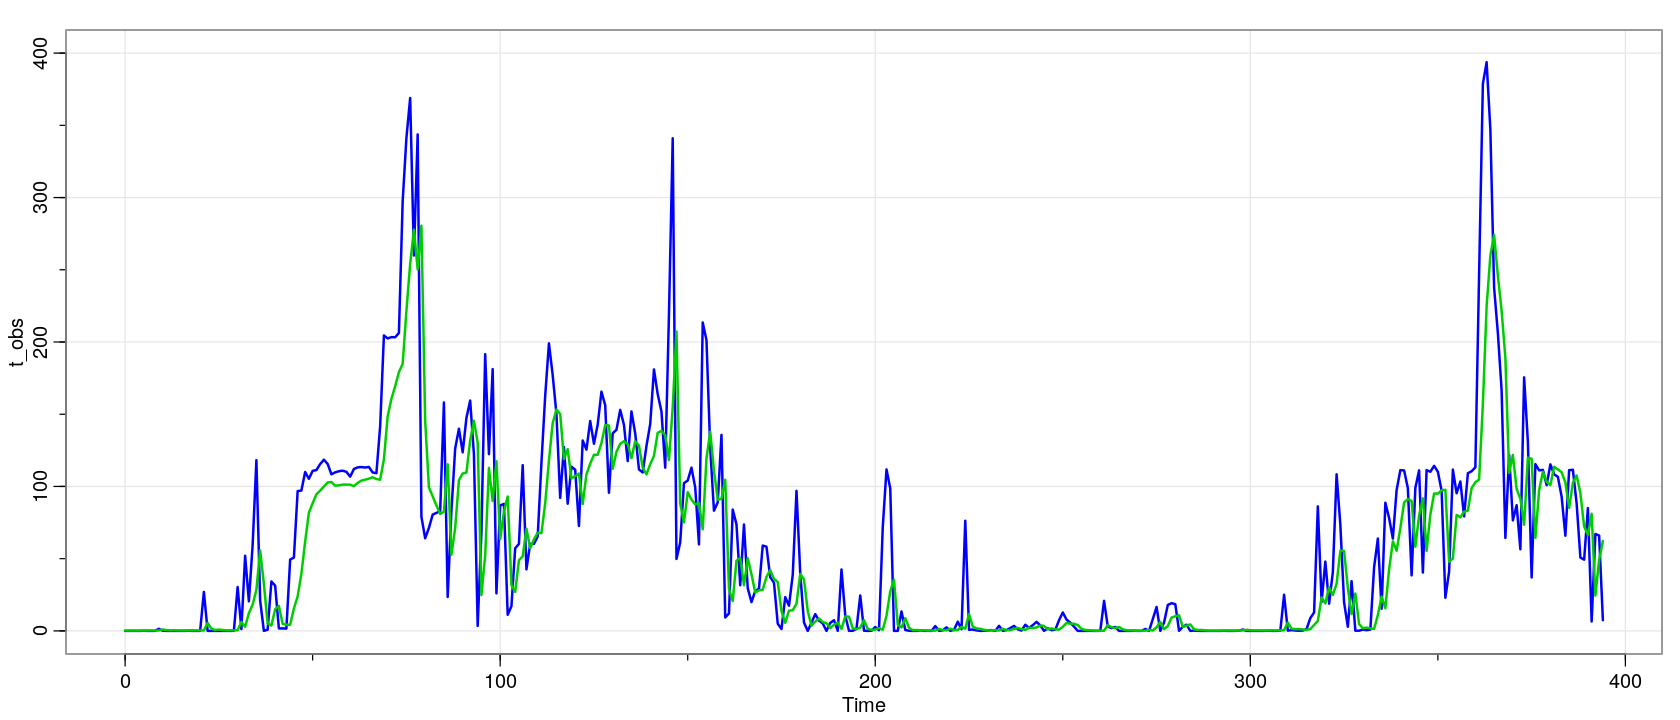

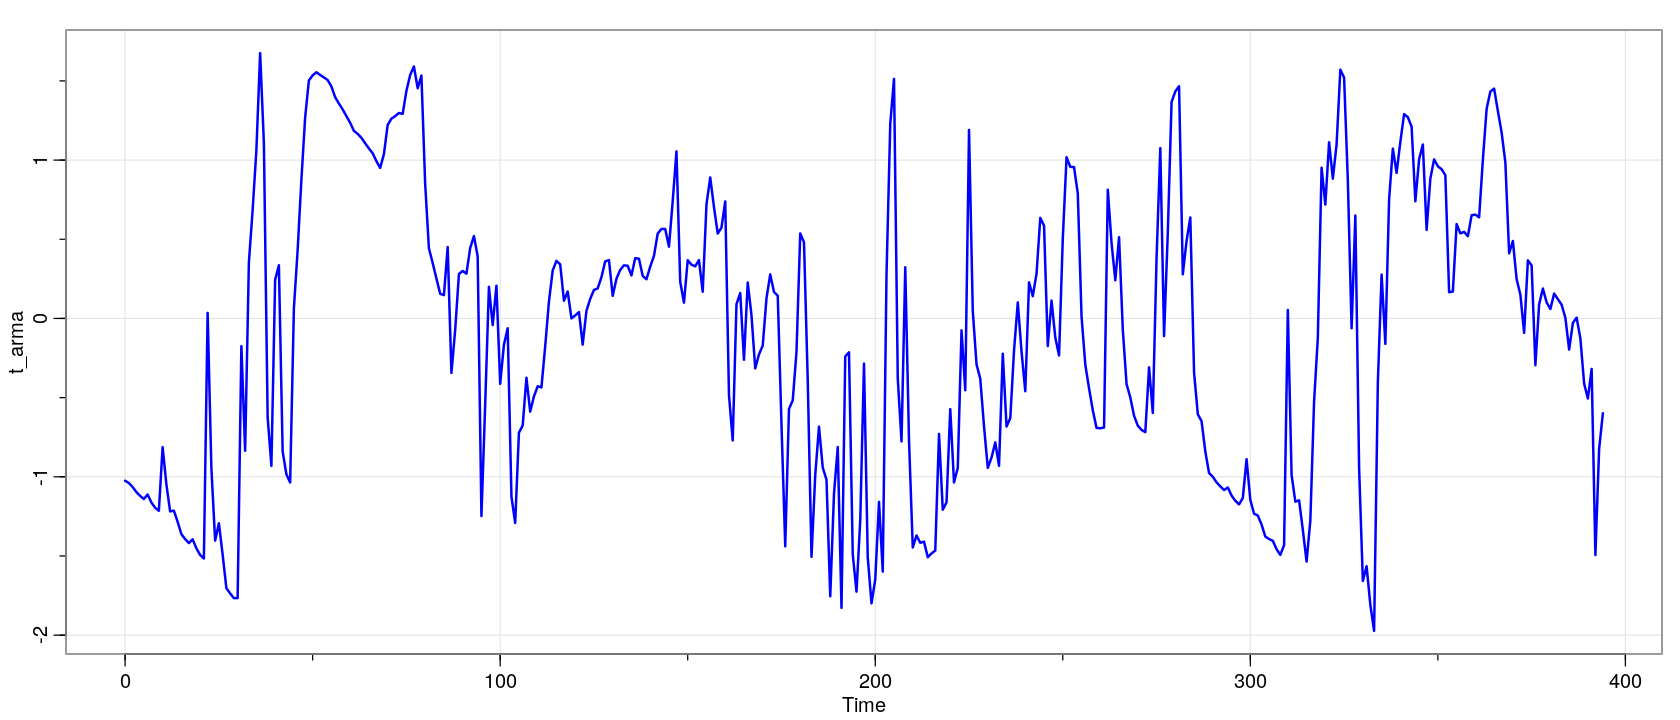

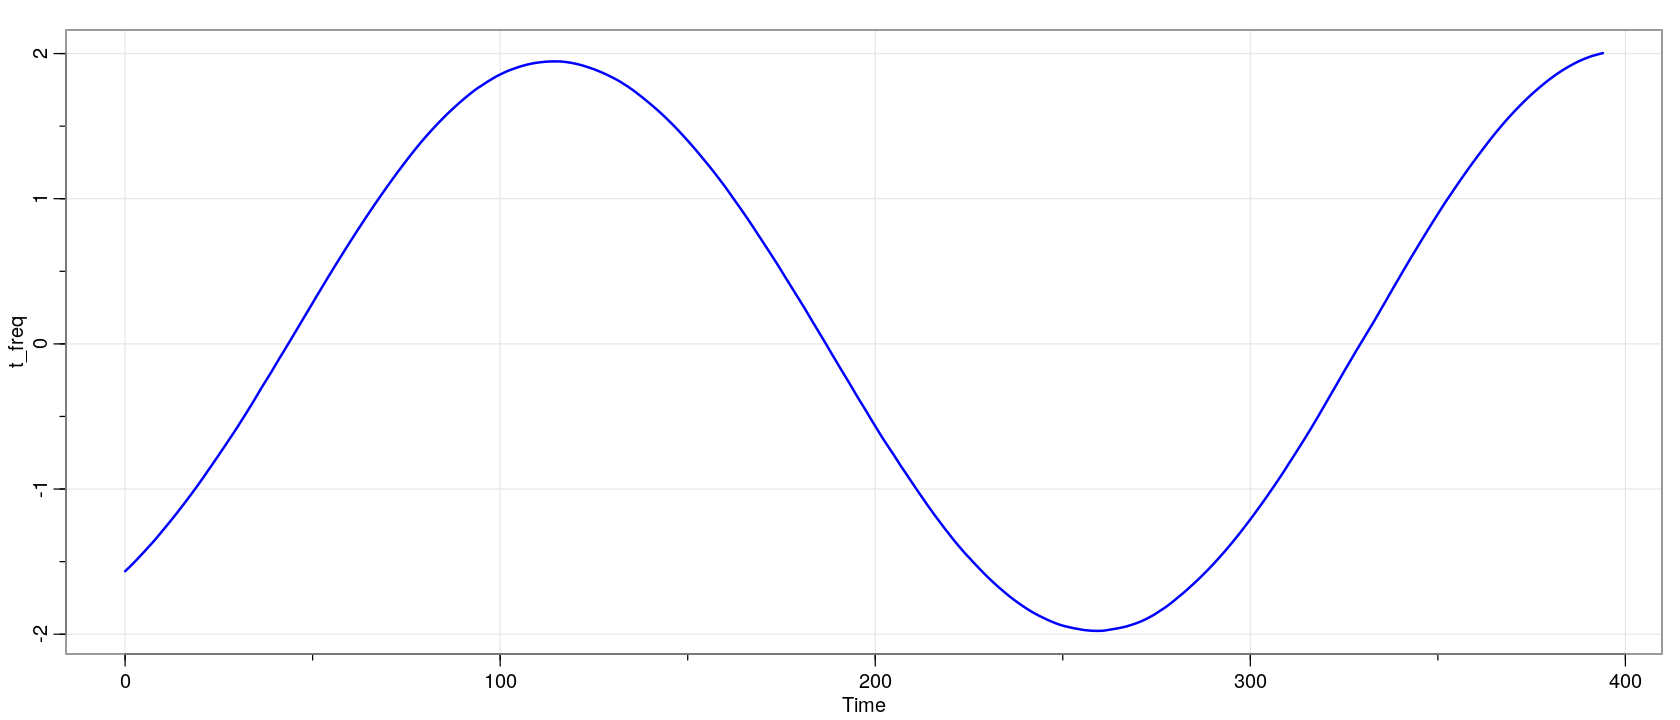

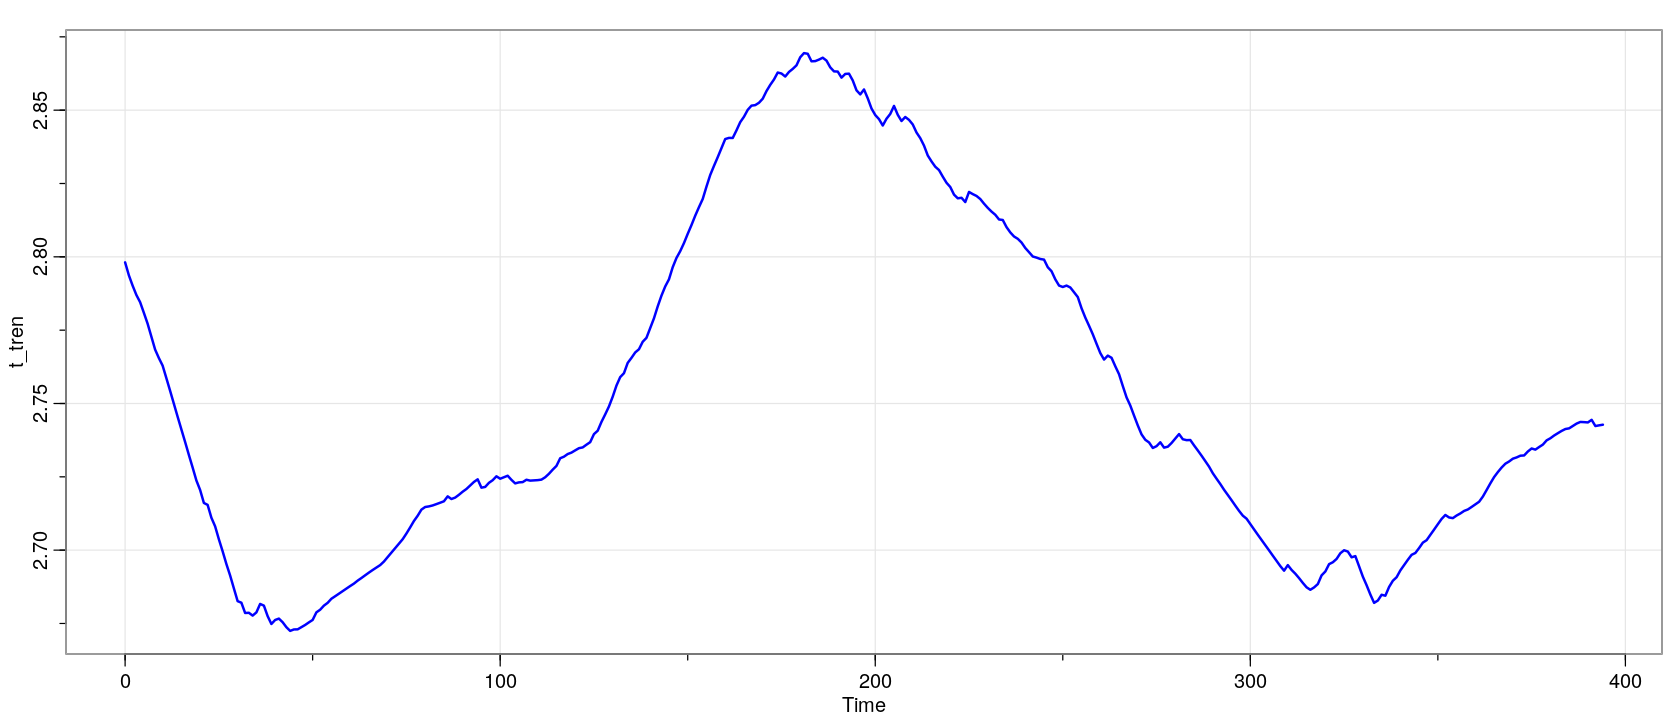

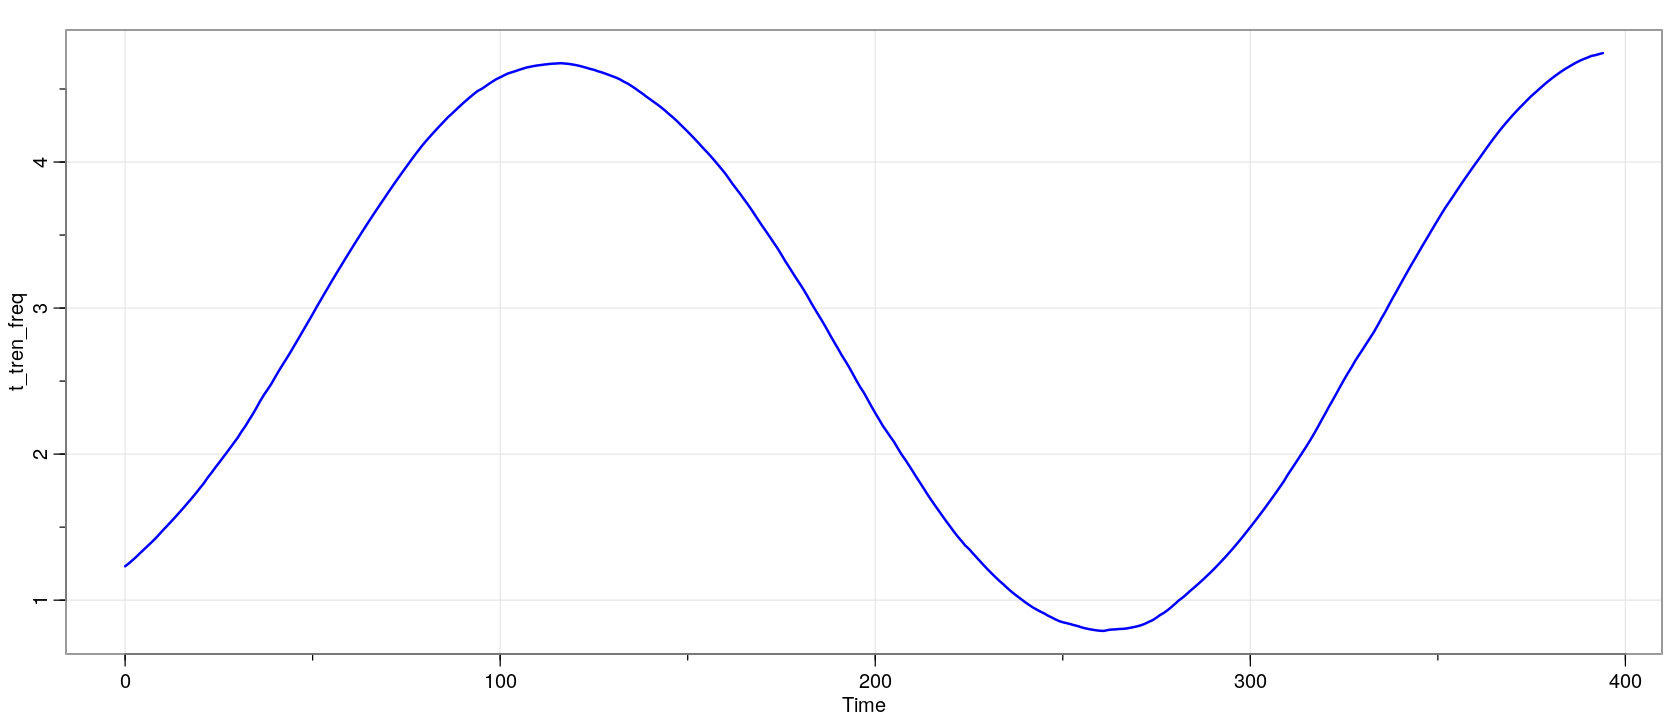

In [26]:
tsplot(t_obs, col=4, lwd=2, ylim=c(0,400))
lines(t_pred, col=3, lwd=2)

tsplot(t_arma, col=4, lwd=2)
tsplot(t_freq, col=4, lwd=2)
tsplot(t_tren, col=4, lwd=2)

tsplot(t_tren_freq, col=4, lwd=2)


In [27]:
Sys.time()

[1] "2021-07-24 17:22:50 -03"

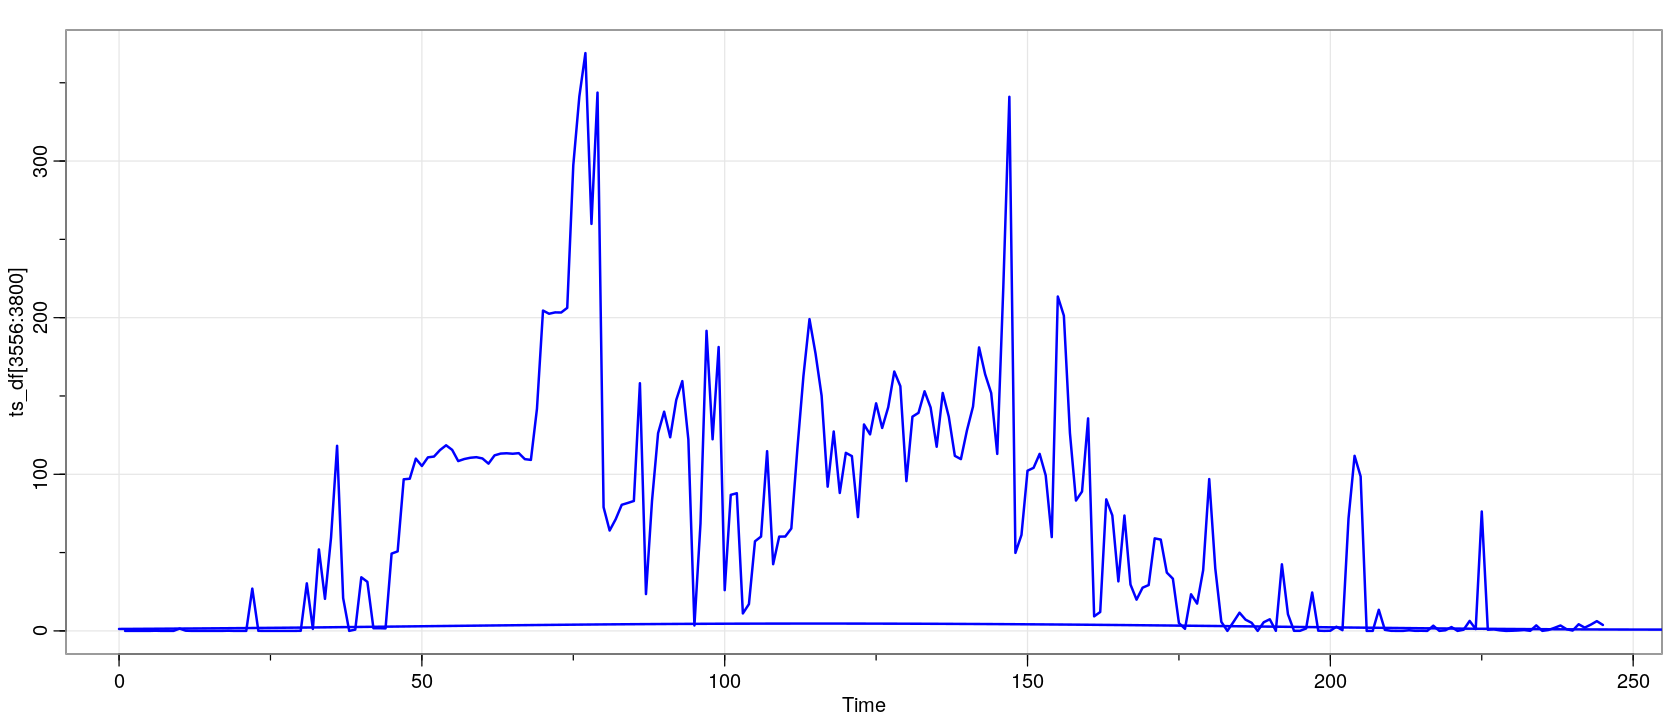

In [29]:
tsplot(ts_df[3556:3800], col=4, lwd=2)
lines(t_tren_freq, col=4, lwd=2)